# Numerical Methods - Assignment 1

## 1. Python and MATLAB
List at least 3 differences between Python and MATLAB.

## 2. Plot Data
**Read the data and create a plot.**
- Import `matplotlib` and `pandas` packages.
- Read in `data/ethanol_IR.csv` file and create a plot of IR spectra data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/ethanol_IR.csv')

In [2]:
x = df['wavenumber [cm^-1]']
y = df['absorbance']

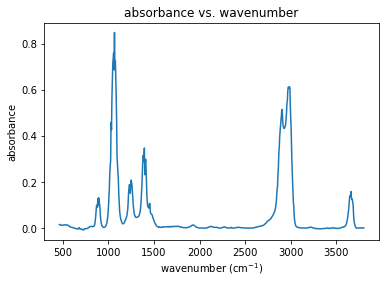

In [3]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('wavenumber (cm$^{-1}$)')
ax.set_ylabel('absorbance')
ax.set_title('absorbance vs. wavenumber');

**Briefly describe the most prominent peaks in the dataset.**

## 3. Matrix-vector Multiplication
**Write a funcion that uses `for` loops.**

This function should multiply an arbitrary matrix and vector.

In [4]:
def mulMatVec(matrix, vector):
    result = []
    
    for i in range(matrix.shape[0]):
        dot = 0
        
        for j in range(matrix.shape[1]):
            dot += matrix[i][j] * vector[j]
            
        result.append(dot)
        
    result = np.array(result)
    return result

You can use the matrix and vector given below.

In [5]:
import numpy as np

A = np.array([[1, 2], [-4, 5]])
B = np.array([-2, 3])

Or create an arbitrary set of matrix and vector using `numpy.random.rand`.

In [6]:
from numpy.random import rand

# You can create your own inputs

**Show that your function is correct using `numpy.isclose`.**

In [7]:
np.isclose(mulMatVec(A, B), np.dot(A, B))

array([ True,  True])

## 4. Vandermonde Matrix
**Use `numpy.hstack` to construct a 4th-order Vandermonde matrix.**

Range should be from -1 to 1 with a resolution of 25 (i.e. the number of rows should be 25).

In [8]:
resolution = 25

xi = np.linspace(-1, 1, 25).reshape(-1, 1)

X_vdm = np.hstack((xi**0, xi**1, xi**2, xi**3, xi**4))

print(X_vdm)

[[ 1.00000000e+00 -1.00000000e+00  1.00000000e+00 -1.00000000e+00
   1.00000000e+00]
 [ 1.00000000e+00 -9.16666667e-01  8.40277778e-01 -7.70254630e-01
   7.06066744e-01]
 [ 1.00000000e+00 -8.33333333e-01  6.94444444e-01 -5.78703704e-01
   4.82253086e-01]
 [ 1.00000000e+00 -7.50000000e-01  5.62500000e-01 -4.21875000e-01
   3.16406250e-01]
 [ 1.00000000e+00 -6.66666667e-01  4.44444444e-01 -2.96296296e-01
   1.97530864e-01]
 [ 1.00000000e+00 -5.83333333e-01  3.40277778e-01 -1.98495370e-01
   1.15788966e-01]
 [ 1.00000000e+00 -5.00000000e-01  2.50000000e-01 -1.25000000e-01
   6.25000000e-02]
 [ 1.00000000e+00 -4.16666667e-01  1.73611111e-01 -7.23379630e-02
   3.01408179e-02]
 [ 1.00000000e+00 -3.33333333e-01  1.11111111e-01 -3.70370370e-02
   1.23456790e-02]
 [ 1.00000000e+00 -2.50000000e-01  6.25000000e-02 -1.56250000e-02
   3.90625000e-03]
 [ 1.00000000e+00 -1.66666667e-01  2.77777778e-02 -4.62962963e-03
   7.71604938e-04]
 [ 1.00000000e+00 -8.33333333e-02  6.94444444e-03 -5.78703704e-04

**Create an orthonormal version of the Vandermonde matrix.**

Orthonormal means:
- the $L_2$ norm of each column is 1.
- the inner product between any 2 columns is 0.

Print the orthonormalized Vandermonde matrix.

In [9]:
# Gram-Schmidt Process

ortho_1 = X_vdm[:, 0]
ortho_2 = X_vdm[:, 1] - np.dot(ortho_1, X_vdm[:, 1]) / np.dot(ortho_1, ortho_1) * ortho_1
ortho_3 = X_vdm[:, 2] - np.dot(ortho_1, X_vdm[:, 2]) / np.dot(ortho_1, ortho_1) * ortho_1 - np.dot(ortho_2, X_vdm[:, 2]) / np.dot(ortho_2, ortho_2) * ortho_2
ortho_4 = X_vdm[:, 3] - np.dot(ortho_1, X_vdm[:, 3]) / np.dot(ortho_1, ortho_1) * ortho_1 - np.dot(ortho_2, X_vdm[:, 3]) / np.dot(ortho_2, ortho_2) * ortho_2 - np.dot(ortho_3, X_vdm[:, 3]) / np.dot(ortho_3, ortho_3) * ortho_3
ortho_5 = X_vdm[:, 4] - np.dot(ortho_1, X_vdm[:, 4]) / np.dot(ortho_1, ortho_1) * ortho_1 - np.dot(ortho_2, X_vdm[:, 4]) / np.dot(ortho_2, ortho_2) * ortho_2 - np.dot(ortho_3, X_vdm[:, 4]) / np.dot(ortho_3, ortho_3) * ortho_3 - np.dot(ortho_4, X_vdm[:, 4]) / np.dot(ortho_4, ortho_4) * ortho_4

# Normalizing columns

orthoNorm_1 = ortho_1 / np.linalg.norm(ortho_1, 2)
orthoNorm_2 = ortho_2 / np.linalg.norm(ortho_2, 2)
orthoNorm_3 = ortho_3 / np.linalg.norm(ortho_3, 2)
orthoNorm_4 = ortho_4 / np.linalg.norm(ortho_4, 2)
orthoNorm_5 = ortho_5 / np.linalg.norm(ortho_5, 2)

# Change to columns

orthoNorm_1 = orthoNorm_1.reshape(-1, 1)
orthoNorm_2 = orthoNorm_2.reshape(-1, 1)
orthoNorm_3 = orthoNorm_3.reshape(-1, 1)
orthoNorm_4 = orthoNorm_4.reshape(-1, 1)
orthoNorm_5 = orthoNorm_5.reshape(-1, 1)

# Build a matrix

X_vdm_orthonorm = np.hstack((orthoNorm_1, orthoNorm_2, orthoNorm_3, orthoNorm_4, orthoNorm_5))
print(X_vdm_orthonorm)

[[ 2.00000000e-01 -3.32820118e-01  3.96566460e-01 -4.15922412e-01
   4.01324069e-01]
 [ 2.00000000e-01 -3.05085108e-01  2.97424845e-01 -2.07961206e-01
   6.68873448e-02]
 [ 2.00000000e-01 -2.77350098e-01  2.06904240e-01 -4.52089579e-02
  -1.36682835e-01]
 [ 2.00000000e-01 -2.49615088e-01  1.25004645e-01  7.64442378e-02
  -2.37146040e-01]
 [ 2.00000000e-01 -2.21880078e-01  5.17260600e-02  1.61108286e-01
  -2.59618073e-01]
 [ 2.00000000e-01 -1.94145069e-01 -1.29315150e-02  2.12893092e-01
  -2.26570966e-01]
 [ 2.00000000e-01 -1.66410059e-01 -6.89680800e-02  2.35908562e-01
  -1.57832983e-01]
 [ 2.00000000e-01 -1.38675049e-01 -1.16383635e-01  2.34264600e-01
  -7.05886207e-02]
 [ 2.00000000e-01 -1.10940039e-01 -1.55178180e-01  2.12071111e-01
   2.06213948e-02]
 [ 2.00000000e-01 -8.32050294e-02 -1.85351715e-01  1.73438002e-01
   1.03900105e-01]
 [ 2.00000000e-01 -5.54700196e-02 -2.06904240e-01  1.22475177e-01
   1.69994319e-01]
 [ 2.00000000e-01 -2.77350098e-02 -2.19835755e-01  6.32925410e-02

**Short version**

In [10]:
X_vdm_ortho = [X_vdm[:, 0] / np.linalg.norm(X_vdm[:, 0], 2)]

for i in range(1, X_vdm.shape[1]):
    gramSchmidt = X_vdm[:, i]
    
    for j in range(i):
        gramSchmidt -= np.dot(X_vdm[:, i], X_vdm_ortho[j]) * X_vdm_ortho[j]
        
    X_vdm_ortho.append(gramSchmidt / np.linalg.norm(gramSchmidt, 2))

X_vdm_ortho = np.array(X_vdm_ortho)
X_vdm_ortho = X_vdm_ortho.T

In [11]:
np.isclose(X_vdm_ortho, X_vdm_orthonorm).all()

True

**Show that the $L_2$ of 5th column is 1.**

In [12]:
print(np.linalg.norm(X_vdm_orthonorm[:, 4], 2))

1.0


**Show that the inner product between 1st column & 4th column is 0.**

In [13]:
inn_prod = np.dot(X_vdm_orthonorm[:, 0], X_vdm_orthonorm[:, 3])
print(inn_prod)
print(np.isclose(0, inn_prod))

2.0816681711721685e-17
True


**Compute the rank of the orthonormalized Vandermonde matrix.**

In [14]:
print(np.linalg.matrix_rank(X_vdm_orthonorm))

5


**Show that the rank is equal to the number of columns.**

In [15]:
print('The rank of the matrix: {}'.format(np.linalg.matrix_rank(X_vdm_orthonorm)))
print('The number of columns: {}'.format(X_vdm_orthonorm.shape[1]))

The rank of the matrix: 5
The number of columns: 5


**Change the resolution to 30 and show that the rank is independent of the number of rows.**

In [16]:
xi_new = np.linspace(-1, 1, 30).reshape(-1, 1)

X_vdm_new = np.hstack((xi_new**0, xi_new**1, xi_new**2, xi_new**3, xi_new**4))

print('The rank of the new matrix: {}'.format(np.linalg.matrix_rank(X_vdm_new)))
print('The number of rows of the old matrix: {}'.format(X_vdm_orthonorm.shape[0]))
print('The number of rows of the new matrix: {}'.format(X_vdm_new.shape[0]))

The rank of the new matrix: 5
The number of rows of the old matrix: 25
The number of rows of the new matrix: 30


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gaussian-Features" data-toc-modified-id="Gaussian-Features-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gaussian Features</a></span></li><li><span><a href="#General-Linear-Regression" data-toc-modified-id="General-Linear-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>General Linear Regression</a></span></li><li><span><a href="#Non-linear-Regression" data-toc-modified-id="Non-linear-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Non-linear Regression</a></span></li></ul></div>

# Numerical Methods - Assignment 2

## Gaussian Features
**Write a function that creates a set of evenly-spaced Gaussian functions.**

The input should be an vector $x$, a number of Gaussians $N$, and a fixed width $\sigma$.

In [1]:
def gaussian_features(x, N, sigma):
    x = x.reshape(-1)
    xk_vec = np.linspace(min(x), max(x), N)
    features = []
    
    for xk in xk_vec:
        features.append(np.exp( -(x - xk)**2 / 2 / sigma**2 ))
        
    features = np.array(features).T
    return features

**Use this function to plot 8 evenly-spaced Gaussians from -1 to 1 with a width of 0.2.**

You can arbitrarily define the resolution of the range, but the resolution should be high enough that the plots look smooth.

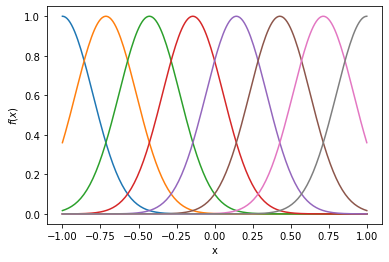

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1, 1, 200)
X = gaussian_features(x, 8, 0.2)

fig, ax = plt.subplots()

for i in range(X.shape[1]):
    ax.plot(x, X[:, i])
    
ax.set_xlabel('x')
ax.set_ylabel('$\mathit{f(x)}$')
plt.show()

## General Linear Regression
**Determine the best-fit of the peaks below using general linear regression.**

Plot the result of your regression model along with the original data. You can use visual inspection to determine the positions and widths of the peaks.

You may assume that:
- The peaks follow a Gaussian distribution.
- There are 3 peaks of the **same width** in this region of the spectra below.

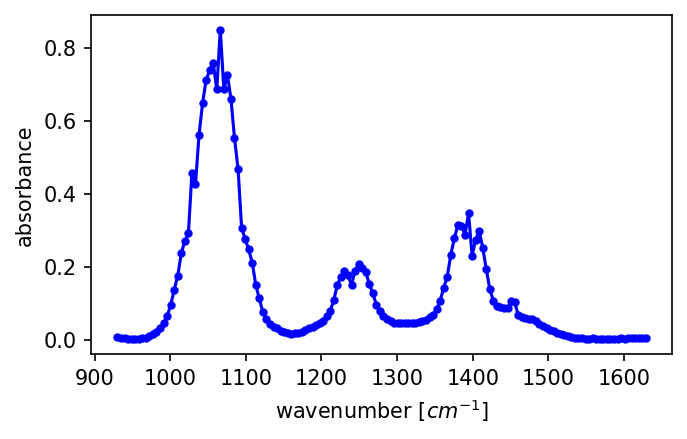

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/ethanol_IR.csv')
x_all = df['wavenumber [cm^-1]'].values
y_all = df['absorbance'].values

x_peak = x_all[100:250]
y_peak = y_all[100:250]

fig, ax = plt.subplots(figsize = (5, 3), dpi = 150)
ax.plot(x_peak, y_peak, '-b', marker = '.')
ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance');

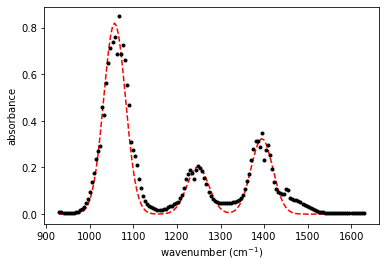

In [4]:
X_gauss = np.zeros((len(x_peak), 3))
X_gauss[:, 0] = np.exp(-(x_peak - 1057)**2 / 2 / 25**2)
X_gauss[:, 1] = np.exp(-(x_peak - 1248)**2 / 2 / 25**2)
X_gauss[:, 2] = np.exp(-(x_peak - 1395)**2 / 2 / 25**2)

A = X_gauss.T@X_gauss
b = X_gauss.T@y_peak

w_lsr = np.linalg.solve(A, b)
yhat = X_gauss@w_lsr

fig, ax = plt.subplots()
ax.plot(x_peak, yhat, '--r')
ax.plot(x_peak, y_peak, '.k')
ax.set_xlabel('wavenumber (cm$^{-1}$)')
ax.set_ylabel('absorbance')
plt.show()

**Briefly describe the result.**

**Continue improving the general linear regression model.**

Now the second assumption is gone. You do not know how many peaks there are, or the widths of the peaks. However, you do know that they follow Gaussian distributions.

- Use your intuition and trial-and-error to find a model that describes the data.
- Plot the result along with the original data.
- This is not a spectroscopy class. There is no "right answer" to this question.

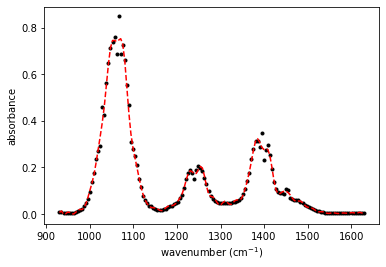

In [5]:
m = 250

X_gauss = gaussian_features(x_peak, m, sigma = 25)

A = X_gauss.T@X_gauss
b = X_gauss.T@y_peak

w_lsr = np.linalg.solve(A, b)
y_hat = X_gauss@w_lsr

fig, ax = plt.subplots()
ax.plot(x_peak, y_peak, '.k')
ax.plot(x_peak, y_hat, '--r')
ax.set_xlabel('wavenumber (cm$^{-1}$)')
ax.set_ylabel('absorbance')
plt.show()

## Non-linear Regression

**Write a loss function.**

You want to solve the same problem above using non-linear regression to find the optimal positions and widths of the peaks.

The inputs of the loss function should be:
- a parameter vector $\vec{\lambda} = [ \vec{w}, \vec{\mu}, \vec{\sigma} ]$
- an input vector $x$
- an output vector $y$
- a number of Gaussians $n$

The function should return a root-mean-squared error of the estimation.

In [6]:
def gaussian_loss(lamda, x, y, n):
    y_hat = np.zeros(len(y))
    
    for i in range(m):
        w_i = lamda[i]
        mu_i = lamda[m + i]
        sigma_i = lamda[2 * m + i]
        
        y_hat = y_hat + w_i * np.exp( -(x - mu_i)**2 / 2 / sigma_i**2 )
    
    squared_error = (y - y_hat)**2
    RMSE = np.sqrt(np.sum(squared_error) / len(y))
    return RMSE

**Use `autograd` to compute the derivative of the loss function.**

Find the derivative of the loss function when the parameter vector is [10., 10., 10., 1000., 1250., 1500., 30., 30., 30].

In [7]:
import autograd.numpy as np
from autograd import grad

lamda = np.array([10., 10., 10., 1000., 1250., 1500., 30., 30., 30])
m = 3

def g(lamda, x = x_peak, y = y_peak, m = m):
    return gaussian_loss(lamda, x, y, m)

diff_g = grad(g)

print('Derivative of the loss function: {}'.format(diff_g(lamda)))

Derivative of the loss function: [ 1.57005748e-01  1.58308313e-01  1.60464500e-01 -1.40645451e-03
  8.40456069e-05  2.05938443e-04  2.45406270e-02  2.63444151e-02
  2.65071027e-02]


**Implement gradient descent method.**

Write a function for an iteration of gradient descent that returns the optimal parameters.

The inputs are:
- a parameter vector $\vec{\lambda}$
- a function $g$
- a step size
- a tolerance

In [8]:
# We can use various convergence criterion

# i. root mean square of the displacement between the current and the previous search
def grad_descent(lamda, g, h, tol):
    err = np.inf
    old_lamda = lamda
    
    while err > tol:
        new_lamda = old_lamda - h * g(old_lamda)
        err = np.sqrt(np.mean(new_lamda - old_lamda))
        old_lamda = new_lamda

    return new_lamda

In [9]:
# ii. the norm of the gradient
# I will use this one

def grad_descent(lamda, g, h, tol):
    err = np.inf
    old_lamda = lamda
    
    while err > tol:
        new_lamda = old_lamda - h * g(old_lamda)
        err = np.linalg.norm(g(old_lamda), 2)
        old_lamda = new_lamda
        
    return new_lamda

**Find the optimal parameters.**

Plot the result of non-linear regression along with the original data. Set the number of Gaussians as 5.

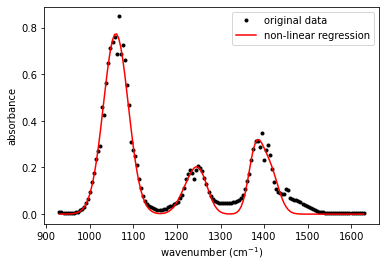

In [10]:
m = 5

guess = np.array([0.6, 0.6, 1.2, .01, 0.1, 1050., 1220., 1250., 1380., 1410., 25., 20., 20., 15., 20.])

f = grad_descent(guess, diff_g, .1, .001)

y_hat = np.zeros(len(y_peak))

for i in range(m):
    w_i = f[i]
    mu_i = f[m + i]
    sigma_i = f[2*m + i]
    
    y_hat += w_i * np.exp( -(x_peak - mu_i)**2 / 2 / sigma_i**2 )
    
fig, ax = plt.subplots()
ax.plot(x_peak, y_peak, '.k', label = 'original data')
ax.plot(x_peak, y_hat, '-r', label = 'non-linear regression')
ax.set_xlabel('wavenumber (cm$^{-1}$)')
ax.set_ylabel('absorbance')
ax.legend()
plt.show()

**Print the weights $\vec{w}$.**

In [11]:
print('Weights: {}'.format(f[:5]))

Weights: [0.77449771 0.07132426 0.17694636 0.23644511 0.20428952]


**Constrain the weights.**

Modify the loss function to constrain the weights to be positive. You can write this in code, or you can write an analytical version of the loss function.

In [12]:
# There are several ways to make constraints

# i. penalize the negative weights (soft constraint)
def gaussian_loss_soft(lamda, x, y, n):
    y_hat = np.zeros(len(y))
    
    for i in range(m):
        w_i = lamda[i]
        mu_i = lamda[m + i]
        sigma_i = lamda[2 * m + i]
        
        y_hat = y_hat + w_i * np.exp( -(x - mu_i)**2 / 2 / sigma_i**2 )
    
    squared_error = (y - y_hat)**2
    soft_const = np.sqrt(np.sum(squared_error) / len(y)) + np.sqrt(np.sum((abs(lamda[:n]) - lamda[:n])**2))
    return soft_const

In [13]:
# ii. force weights to be positive (hard constraint)
def gaussian_loss_hard(lamda, x, y, n):
    y_hat = np.zeros(len(y))
    
    for i in range(m):
        w_i = lamda[i]
        pos_w_i = np.sqrt(w_i**2) # make weights to be positive
        mu_i = lamda[m + i]
        sigma_i = lamda[2*m + i]
        
        y_hat += pos_w_i * np.exp( -(x - mu_i)**2 / 2 / sigma_i**2)
        
    squared_error = (y - y_hat)**2
    hard_const = np.sqrt(np.sum(squared_error) / len(y))
    return hard_const

# Regression - Assignment 3

## Data and Package Import

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt

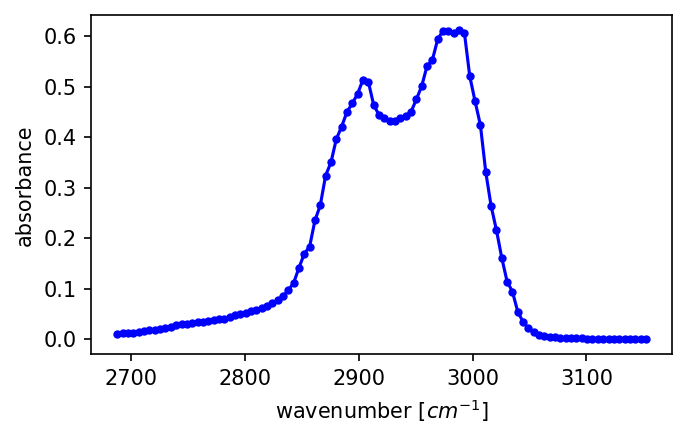

In [2]:
df = pd.read_csv('data/ethanol_IR.csv')
x_all = df['wavenumber [cm^-1]'].values
y_all = df['absorbance'].values

x_peak = x_all[475:575]
y_peak = y_all[475:575]

fig, ax = plt.subplots(figsize = (5, 3), dpi = 150)
ax.plot(x_peak, y_peak, '-b', marker = '.')
ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance');

## 1. Linear Interpolation

**Select every third datapoint from `x_peak` and `y_peak` dataset.**

In [3]:
x_third = x_peak[::3]
y_third = y_peak[::3]

**Use these datapoints to train a linear interpolation model.**

Predict the full dataset using the model and plot the result along with the original dataset.

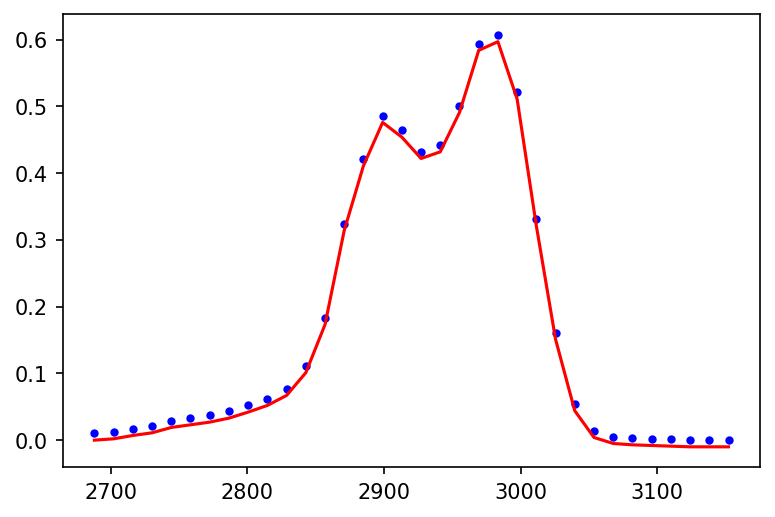

In [4]:
from sklearn.linear_model import LinearRegression

def piecewise_linear(x_train, x_test = None):
    if x_test is None:
        x_test = x_train
        
    N = len(x_test)
    M = len(x_train)
    X = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            X[i, j] = max(0, x_test[i] - x_train[j])
    return X

X_third = piecewise_linear(x_third)
X_third[:, -1] += 1

model = LinearRegression(fit_intercept = False)
model.fit(X_third, y_third)

X_third_test = piecewise_linear(x_third, x_peak)
yhat = model.predict(X_third_test)

fig, ax = plt.subplots(dpi = 150)
ax.plot(x_third, y_third, '.b')
ax.plot(x_peak, yhat, '-r')
plt.show()

**Evaluate the performance of `rbf` kernel as a function of kernel width.**

Use the same strategy as the previous exercise. Vary the width of the radial basis function with $\sigma$ = [1, 10, 50, 100, 150].

Compute the $r^2$ score for each using the entire dataset.

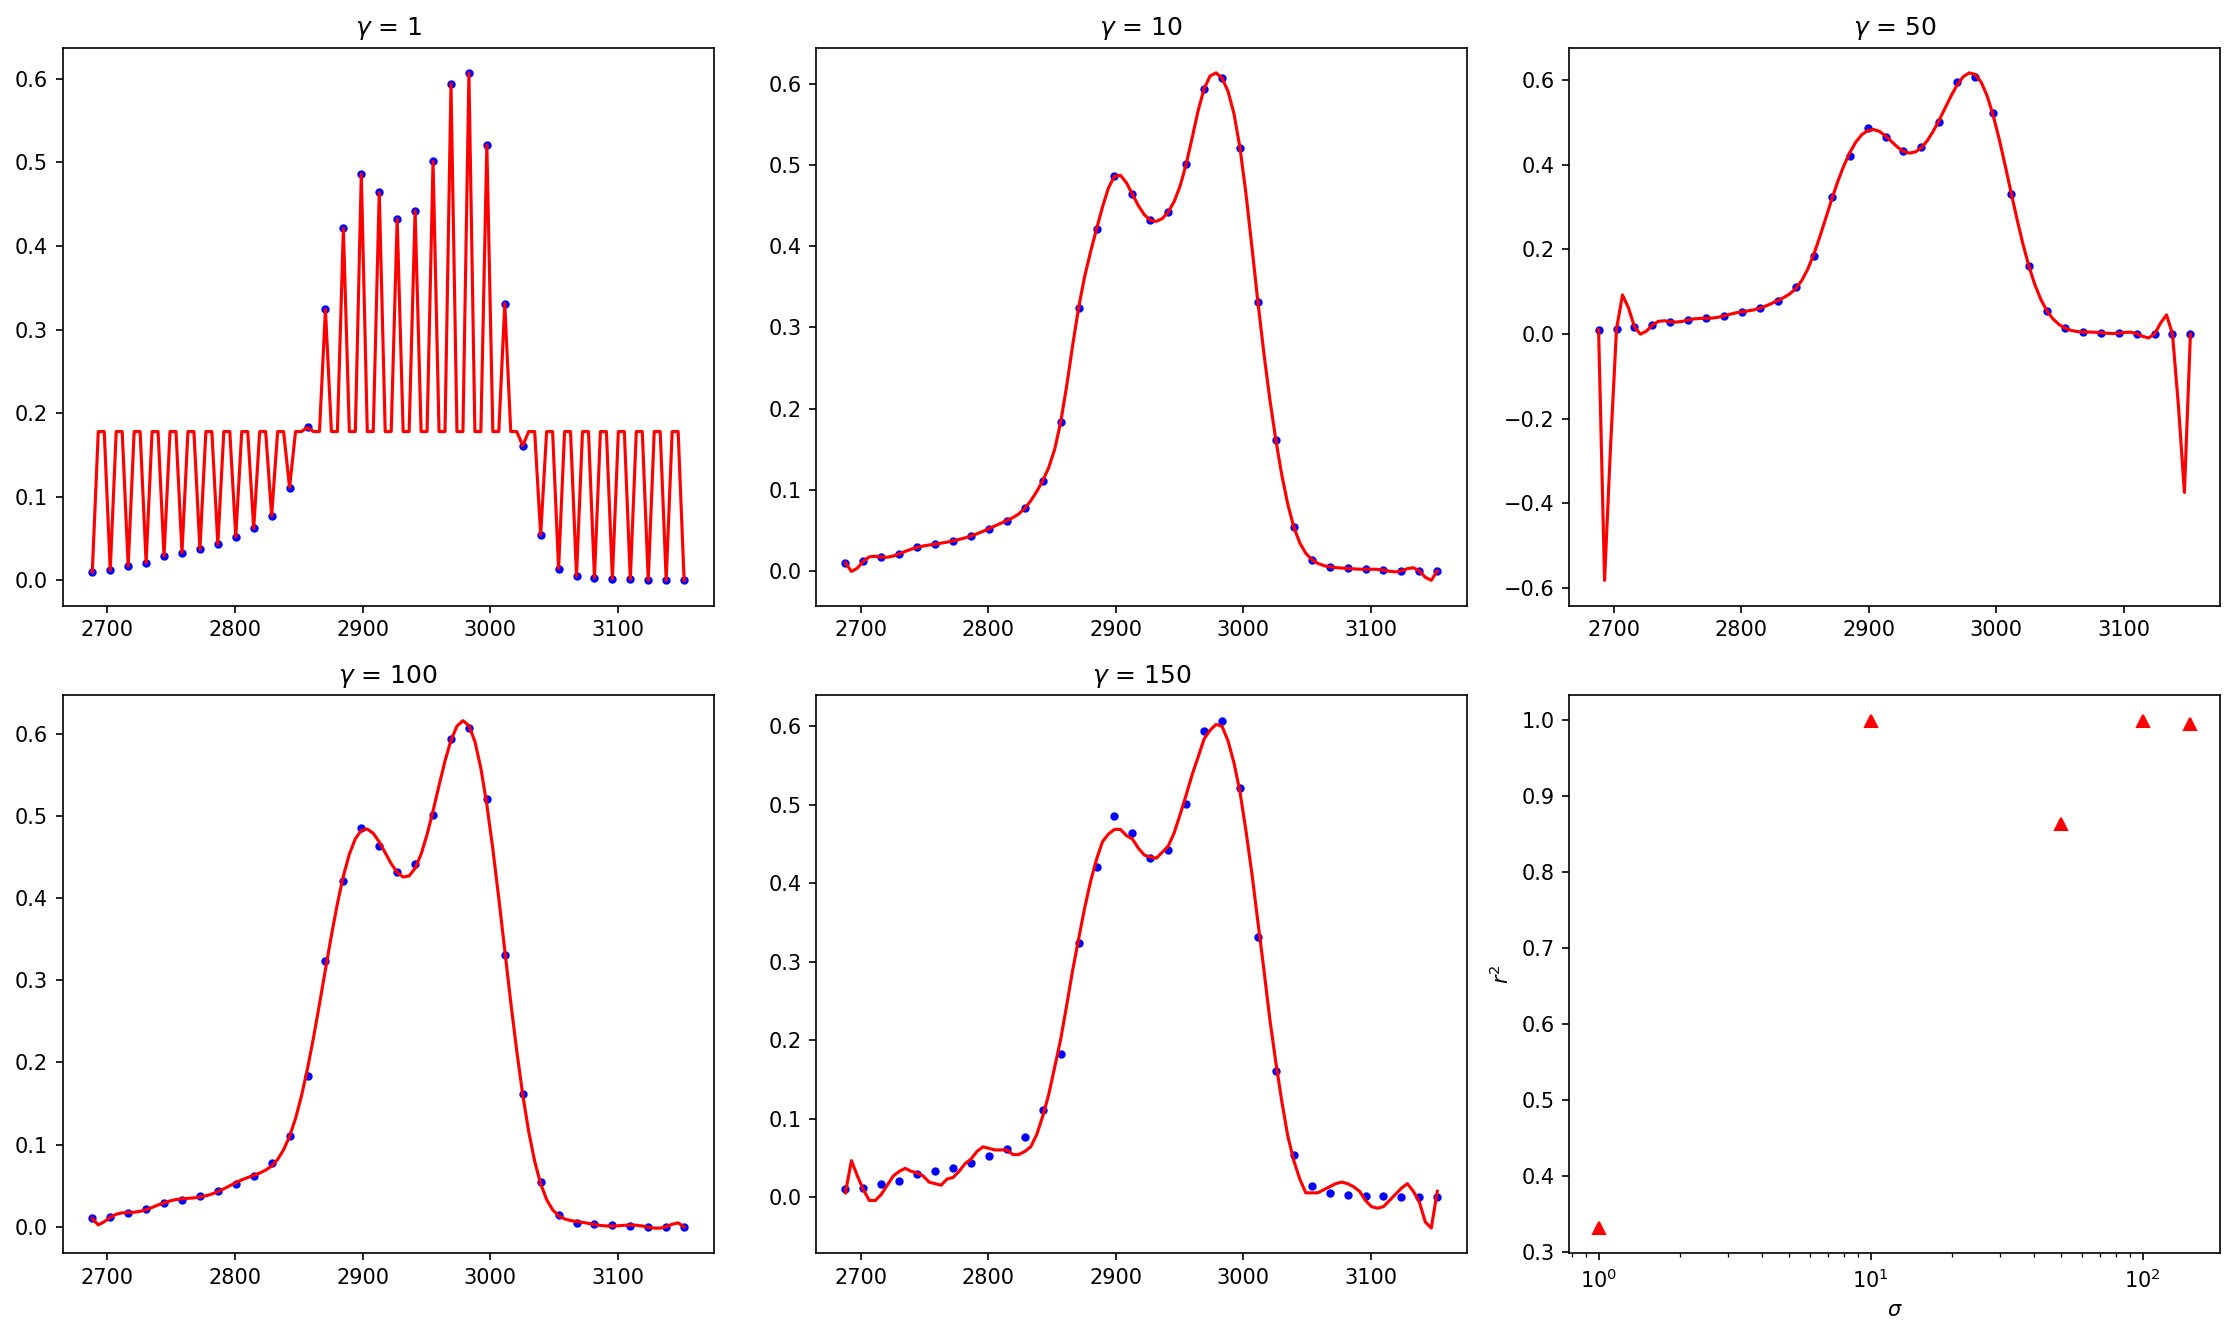

In [5]:
sigmas = np.array([1, 10, 50, 100, 150])
gammas = 1. / 2 / sigmas**2

def rbf(x_train, x_test = None, gamma = 1):
    if x_test is None:
        x_test = x_train
        
    N = len(x_test)
    M = len(x_train)
    X = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            X[i, j] = np.exp(-gamma * (x_test[i] - x_train[j])**2)
            
    return X

x_third = x_peak[::3]
y_third = y_peak[::3]

r2 = []

fig, axes = plt.subplots(2, 3, figsize = (15, 9), dpi = 150)
axes = axes.ravel()

for i, gamma in enumerate(gammas):
    rbf_third = rbf(x_third, gamma = gamma)
    
    model = LinearRegression()
    model.fit(rbf_third, y_third)
    
    rbf_test = rbf(x_third, x_peak, gamma = gamma)
    yhat = model.predict(rbf_test)
    
    axes[i].plot(x_third, y_third, '.b')
    axes[i].plot(x_peak, yhat, '-r')
    axes[i].set_title('$\gamma$ = {}'.format(sigmas[i]))
    
    r2.append(model.score(rbf_test, y_peak))
    
axes[-1].plot(sigmas, r2, 'r^')
axes[-1].set_xscale('log')
axes[-1].set_xlabel('$\sigma$')
axes[-1].set_ylabel('$r^2$')

plt.tight_layout()

**Create a model where $r^2$ < 0.**

You can use any model from the lectures, or make one up.

The model you use does not have to optimized using the data.

r^2: -0.7176717166021713


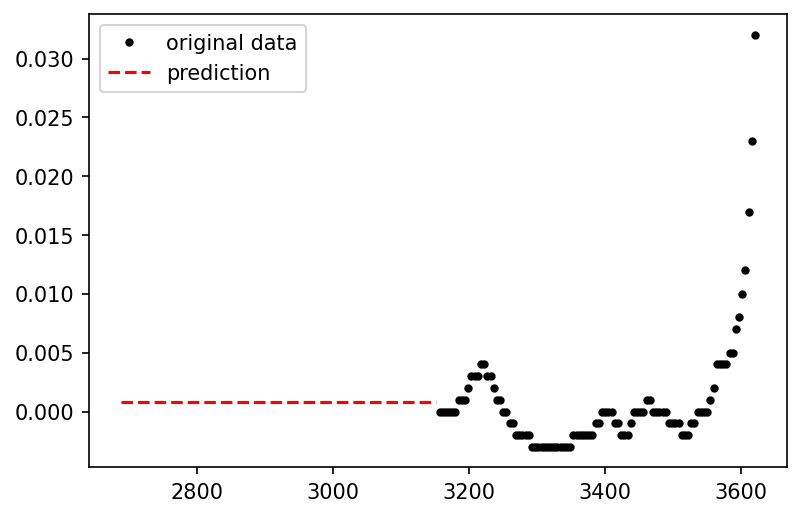

In [6]:
x_data = x_all[575:675]
y_data = y_all[575:675]

rbf_data = rbf(x_data)
model = LinearRegression()
model.fit(rbf_data, y_data)

rbf_test = rbf(x_data, x_third)
yhat = model.predict(rbf_test)

r2 = model.score(rbf_test, y_third)
print('r^2: {}'.format(r2))

fig, ax = plt.subplots(dpi = 150)
ax.plot(x_data, y_data, '.k', label = 'original data')
ax.plot(x_third, yhat, '--r', label = 'prediction')
ax.legend()
plt.show()

**What does negative $r^2$ mean?**

The model is really bad.

## 2. Cauchy Kernel Matrix

**Write a function that computes the Cauchy kernel between any two vectors $x_i$ and $x_j$.**

Consider the Cauchy distribution defined by:

$C(x, x_0, \gamma) = \frac{1}{\pi\gamma} \left( \frac{\gamma^2}{(x-x_0)^2 + \gamma^2} \right)$

- $x_0$ is the center of the distribution. Comparable to the mean ($\mu$) of a Gaussian distribution.
- $\gamma$ is a scale factor. Comparable to the standard deviation ($\sigma$) of a Gaussian distribution.

In [7]:
def cauchy_kernel(x, x_0, gamma):
    N = len(x)
    M = len(x_0)
    
    cauchy_matrix = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            cauchy_matrix[i, j] = gamma**2 / (gamma**2 + (x[i] - x_0[j])**2) / np.pi / gamma
       
    return cauchy_matrix

**Visualize kernel matrices for the ethanol spectra dataset.**

Vary the $\gamma$ with [1, 10, 100].

You may want to use the `plt.imshow` function to visualize the matrices.
Here is an example of using `plt.imshow`.

For more details, see the documentation: https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.imshow.html.

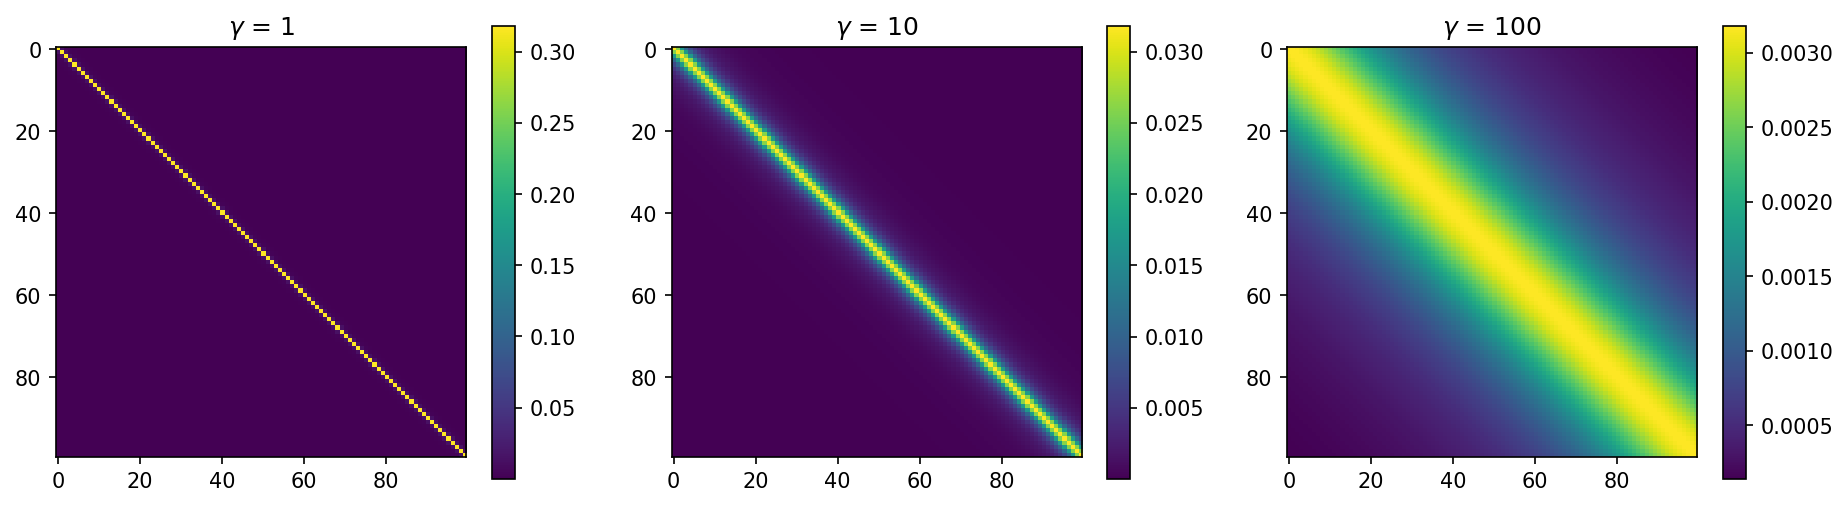

In [8]:
gammas = np.array([1, 10, 100])

fig, axes = plt.subplots(1, 3, figsize = (15, 4), dpi = 150)

for i, gamma in enumerate(gammas):
    cauchy = cauchy_kernel(x_peak, x_peak, gamma)
    im = axes[i].imshow(cauchy, cmap = 'viridis')
    axes[i].set_title('$\gamma$ = {}'.format(gamma))
    
    fig.colorbar(im, ax = axes[i])
    
plt.show()

**Briefly discuss the structure of these matrices.**

As $\gamma$ increases, the distribution becomes wider.

## 3. Anscomb's Quartet

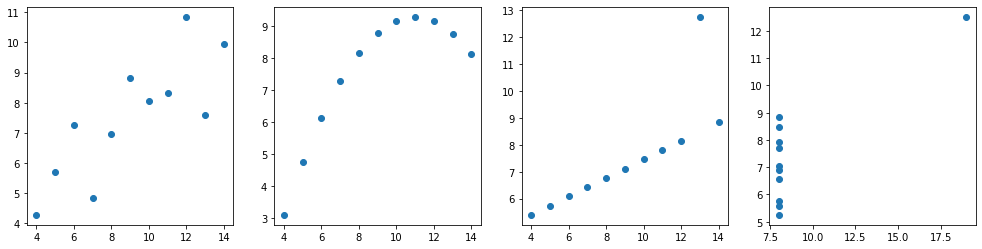

In [9]:
x_aq = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1_aq = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2_aq = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3_aq = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4_aq = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4_aq = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

fig, axes = plt.subplots(1, 4, figsize = (17, 4))

axes[0].scatter(x_aq, y1_aq)
axes[1].scatter(x_aq, y2_aq)
axes[2].scatter(x_aq, y3_aq)
axes[3].scatter(x4_aq, y4_aq);

**Compute the means and standard deviations of each dataset.**

In [10]:
print('Dataset 1 - mean: {}\tstd: {}'.format(y1_aq.mean(), y1_aq.std()))
print('Dataset 2 - mean: {}\tstd: {}'.format(y2_aq.mean(), y2_aq.std()))
print('Dataset 3 - mean: {}\tstd: {}'.format(y3_aq.mean(), y3_aq.std()))
print('Dataset 4 - mean: {}\tstd: {}'.format(y4_aq.mean(), y4_aq.std()))

Dataset 1 - mean: 7.500909090909093	std: 1.937024215108669
Dataset 2 - mean: 7.50090909090909	std: 1.93710869148962
Dataset 3 - mean: 7.5	std: 1.9359329439927313
Dataset 4 - mean: 7.500909090909091	std: 1.9360806451340837


**Use a linear regression to find a model $\hat{y}=mx+b$ for each dataset.**

Create a parity plot between the model and the actual $y$ values.

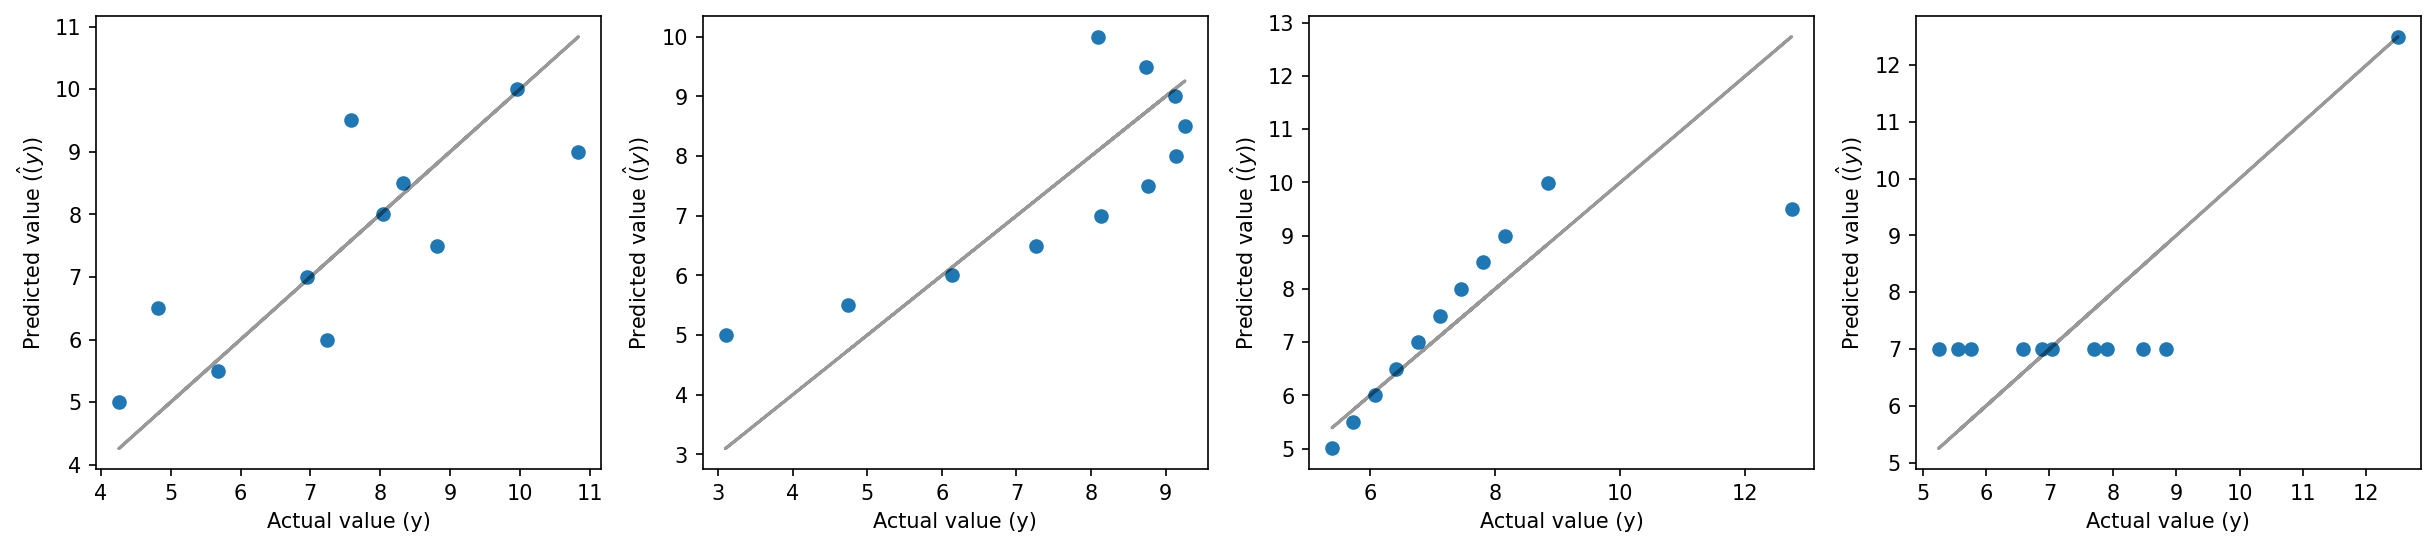

In [11]:
def calc_stats(x, y):
    m, b = np.polyfit(x, y, deg = 1)
    return m, b

xList = [x_aq, x_aq, x_aq, x4_aq]
yList = [y1_aq, y2_aq, y3_aq, y4_aq]
yhatList = []

for i, x in enumerate(xList):
    m, b = calc_stats(x, yList[i])
    yhatList.append(m * x + b)
    
fig, axes = plt.subplots(1, 4, figsize = (20, 4), dpi = 150)
for i, ax in enumerate(axes):
    ax.scatter(yList[i], yhatList[i])
    ax.plot(yList[i], yList[i], '-k', alpha = .4)
    ax.set_xlabel('Actual value (y)')
    ax.set_ylabel('Predicted value ($\hat(y)$)')
    
plt.show()

## 4. Assumptions for Linear Regression

**List the assumptions of linear regression and the corresponding error estimation based on the standard deviation of the error.**

Linear regression assumptions:
- Error is normally distributed
- Error is homoscedastic
- The relationship between the variable is linear

We can calculate the uncertainty of the error based on the standard deviation of the error by using the following equation:

$\vec\sigma_y = \sigma_{error} \sqrt{1 + \frac{1}{n} + \frac{(\vec{x} - \bar{x})^2}{(\sum_j x_j - \bar{x})^2}}$

where $\vec\sigma_y$ is the uncertainty and $\sigma_{error}$ is the standard deviation of the error.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mean-Absolute-Errors" data-toc-modified-id="Mean-Absolute-Errors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mean Absolute Errors</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#3.-GridSearchCV" data-toc-modified-id="3.-GridSearchCV-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. GridSearchCV</a></span></li><li><span><a href="#Ensemble-Kernel-Ridge-Regression" data-toc-modified-id="Ensemble-Kernel-Ridge-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Ensemble Kernel Ridge Regression</a></span></li></ul></div>

# Regression - Assignment 4

Data and Package Import

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt

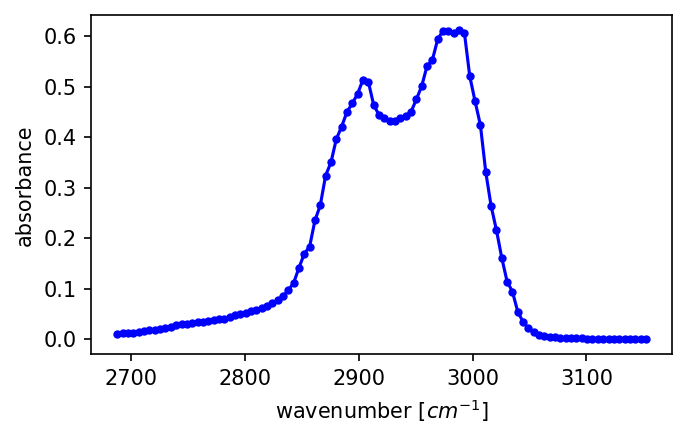

In [2]:
df = pd.read_csv('data/ethanol_IR.csv')
x_all = df['wavenumber [cm^-1]'].values
y_all = df['absorbance'].values

x_peak = x_all[475:575]
y_peak = y_all[475:575]

fig, ax = plt.subplots(figsize = (5, 3), dpi = 150)
ax.plot(x_peak, y_peak, '-b', marker = '.')
ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance');

## Mean Absolute Errors

**Write a function that computes the mean absolute error (MAE).**

In [3]:
def MAE(actual, prediction):
    mae = abs(actual - prediction).mean()
    return mae

**Use 8-fold cross-validation to compute the average and standard deviation of the MAE on the spectra dataset.**

Use a `LinearRegression` model and an `rbf` kernel with $\sigma$=100.

Make sure to pass `shuffle = True` argument when you make a `KFold` object.

In [4]:
def rbf(x_train, x_test = None, gamma = 1):
    if x_test is None:
        x_test = x_train
    N = len(x_test)
    M = len(x_train)
    X = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            X[i, j] = np.exp(-gamma * (x_test[i] - x_train[j])**2)
            
    return X

In [5]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

kfold = KFold(n_splits = 8, shuffle = True)
sigma = 100
gamma = 1. / 2 / sigma**2

listMAE = []

for train_index, test_index in kfold.split(x_peak):
    x_train, x_test = x_peak[train_index], x_peak[test_index]
    y_train, y_test = y_peak[train_index], y_peak[test_index]
    
    X_train = rbf(x_train, gamma = gamma)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    X_test = rbf(x_train, x_test, gamma = gamma)
    
    yhat = model.predict(X_test)
    
    mae = MAE(y_test, yhat)
    listMAE.append(mae)
    
listMAE = np.array(listMAE)
mean = listMAE.mean()
std = listMAE.std()

print('Mean of MAE: {}'.format(mean))
print('Standard deviation of MAE: {}'.format(std))

Mean of MAE: 0.007426851366487635
Standard deviation of MAE: 0.00506196808615005


**Determine the optimum $\sigma$ that results in the lowest mean of MAE based on 8-fold cross validation.**

Vary the width of an `rbf` kernel with $\sigma$ = [1, 10, 50, 100, 150].

In [6]:
sigmas = np.array([1, 10, 50, 100, 150])
gammas = 1. / 2 / sigmas**2

findOptimum = []
for gamma in gammas:
    listMAE = []
    for train_index, test_index in kfold.split(x_peak):
        x_train, x_test = x_peak[train_index], x_peak[test_index]
        y_train, y_test = y_peak[train_index], y_peak[test_index]

        X_train = rbf(x_train, gamma = gamma)

        model = LinearRegression()
        model.fit(X_train, y_train)

        X_test = rbf(x_train, x_test, gamma = gamma)

        yhat = model.predict(X_test)

        mae = MAE(y_test, yhat)
        listMAE.append(mae)
        
    listMAE = np.array(listMAE)
    mean = listMAE.mean()
    findOptimum.append(mean)
    
minIndex = findOptimum.index(min(findOptimum))
optGamma = gammas[minIndex]
optSigma = sigmas[minIndex]

print(findOptimum)

print('Optimal gamma: {}'.format(optGamma))
print('Optimal sigma: {}'.format(optSigma))

[0.20038408530712962, 0.5784814793872782, 0.015588800599666802, 0.008753082948173892, 0.016254492921130473]
Optimal gamma: 5e-05
Optimal sigma: 100


## Hyperparameter Tuning

**Reshape `x_peak` and `y_peak` into 2D arrayx.**

In [7]:
x_peak = x_peak.reshape(-1, 1)
y_peak = y_peak.reshape(-1, 1)

**Do a train/test split with `test_size=0.3` for the spectra data.**

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_peak, y_peak, test_size = 0.3)

**Use a `for` loop to determine the optimum regularization strength $\alpha$ of a KRR model.**

Use an `rbf` kernel with $\sigma$=20.

Determine the optimum value of $\alpha$ out of [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1].

In [9]:
from sklearn.kernel_ridge import KernelRidge

alphas = np.array([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1])

sigma = 20
gamma = 1. / 2 / sigma**2

listR2 = []
for alpha in alphas:
    KRR = KernelRidge(alpha = alpha, kernel = 'rbf', gamma = gamma)
    KRR.fit(x_train, y_train)
    
    yhat = KRR.predict(x_test)
    r2 = KRR.score(x_test, y_test)
    listR2.append(r2)
    
maxIndex = listR2.index(max(listR2))
optAlpha = alphas[maxIndex]

print(listR2)
print('Optimal alpha: {}'.format(optAlpha))

[0.9984200372983285, 0.9984430064066064, 0.9983755583531992, 0.998370537316032, 0.9981447116555068, 0.9699372172069529]
Optimal alpha: 0.0001


## 3. GridSearchCV

**Import a LASSO model.**

In [10]:
from sklearn.linear_model import Lasso

**Shuffle the `x_peak` and `y_peak`.**

You can get a shuffled array when you run `x_shuffle, y_shuffle = shuffle(x, y)`.

The reason why we shuffle the data is that `GridSearchCV` does not have an option to shuffle the input data. Note that we automatically shuffled the data using the `shuffle=True` argument in the `Kfold` function.

In [11]:
from sklearn.utils import shuffle

x_peak_shuffle, y_peak_shuffle = shuffle(x_peak, y_peak)

**Build a `GridSearchCV` model that optimizes the hyperparameters of a LASSO model for the spectra data.**

Search over $\alpha \in$ [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1] and $\sigma \in$ [5, 10, 15, 20, 25, 30, 35, 40].

Use 3-fold cross-validation.

*Hint: You will need to use a `for` loop over $\sigma$ values. Unlike KRR, LASSO models do not take `gamma` or `sigma` as a parameter. Therefore, you have to make an `rbf` kernel manually and input it to a LASSO model.*

Obtain the optimum $\alpha$ and the best score for each $\sigma$ value. Use `GridSearchCV.best_score_` as an accuracy metric.

In [12]:
#Let's ignore the warnings
import warnings
warnings.simplefilter('ignore')

In [13]:
# not valid but acceptable answer
from sklearn.model_selection import GridSearchCV

alphas = np.array([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1])
sigmas = np.array([5, 10, 15, 20, 25, 30, 35, 40])

listEstimator = []
listScore = []
for sigma in sigmas:
    gamma = 1. / 2 / sigma**2
    
    x_train, x_test, y_train, y_test = train_test_split(x_peak_shuffle, y_peak_shuffle, test_size = 0.3)
    
    X_train = rbf(x_train, gamma = gamma)
    X_test = rbf(x_train, x_test, gamma = gamma)
    
    lasso = Lasso()
    param_grid = {'alpha': alphas}
    lasso_search = GridSearchCV(lasso, param_grid, cv = 3)
    lasso_search.fit(X_train, y_train)
    
    listEstimator.append(lasso_search.best_estimator_)
    
    score = lasso_search.best_estimator_.score(X_test, y_test)
    listScore.append(score)
    
maxIndex = listScore.index(max(listScore))
optAlpha = listEstimator[maxIndex].alpha
optSigma = sigmas[maxIndex]

print('Optimal alpha: {}'.format(optAlpha))
print('Optimal sigma: {}'.format(optSigma))

Optimal alpha: 0.0001
Optimal sigma: 30


In [14]:
# Using 2 for loops
alphas = np.array([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1])
sigmas = np.array([5, 10, 15, 20, 25, 30, 35, 40])

x_train, x_test, y_train, y_test = train_test_split(x_peak, y_peak, test_size = .3)

findAlpha =[]
for alpha in alphas:
    findSigma = []
    for sigma in sigmas:
        gamma = 1. / 2 / sigma**2
        
        X_train = rbf(x_train, gamma = gamma)
        X_test = rbf(x_train, x_test, gamma = gamma)
        
        lasso = Lasso(alpha = alpha)
        
        lasso.fit(X_train, y_train)
        r2 = lasso.score(X_test, y_test)
        
        findSigma.append(r2)
    optSigmaIndex = findSigma.index(max(findSigma))
    suboptSigma = sigmas[optSigmaIndex]
    submaxR2 = max(findSigma)
    
    findAlpha.append((submaxR2, suboptSigma))
    
optAlphaIndex = findAlpha.index(max(findAlpha))
optAlpha = alphas[optAlphaIndex]
optSigma = findAlpha[optAlphaIndex][1]
maxR2 = findAlpha[optAlphaIndex][0]

print(findAlpha)

[(0.9984186501247988, 15), (0.9984826818030107, 30), (0.9968090612710975, 30), (0.9296158632378431, 30), (-0.011856591089540292, 5), (-0.011856591089540292, 5)]


In [15]:
# Working on using pipeline...

**What is the optimum $\sigma$ and $\alpha$?**

In [16]:
print('Optimal alpha: {}'.format(optAlpha))
print('Optimal sigma: {}'.format(optSigma))

Optimal alpha: 0.0001
Optimal sigma: 30


**Optional Task**

**Check what happens if the input data is not shuffled before the `GridSearchCV`.**

## Ensemble Kernel Ridge Regression

In this problem you will combine ideas from k-fold cross-validation and bootstrapping with KRR to create an **ensemble** of KRR models.

**Reshape `x_peak` and `y_peak` into 2D array.**

In [17]:
x_peak = x_peak.reshape(-1, 1)
y_peak = y_peak.reshape(-1, 1)

**Use 5-fold cross-validation with the spectra data to construct a series of 5 KRR models with a `rbf` kernel with $\gamma$=0.0005 and $\alpha$=0.01.**

Each model will be trained with 80% of the data, but the exact training points will vary each time so the models will also vary.

You can use all of the data points in the `x_peak` for generating the predictions (in other words, predict on both the training and testing data).

In [18]:
kfold = KFold(n_splits = 5, shuffle = True)

yhatList = []

for train_index, test_index in kfold.split(x_peak):
    x_train, x_test = x_peak[train_index], x_peak[test_index]
    y_train, y_test = y_peak[train_index], y_peak[test_index]
    
    KRR = KernelRidge(gamma = 0.0005, kernel = 'rbf', alpha = 0.01)
    KRR.fit(x_train, y_train)
    
    yhat = KRR.predict(x_peak)
    
    yhatList.append(yhat.reshape(-1,))

**Plot the resulting ensemble of models along with the original data.**

The plot should consists of 6 different lines (1 from the original data and 5 from each of the slightly different KRR models).

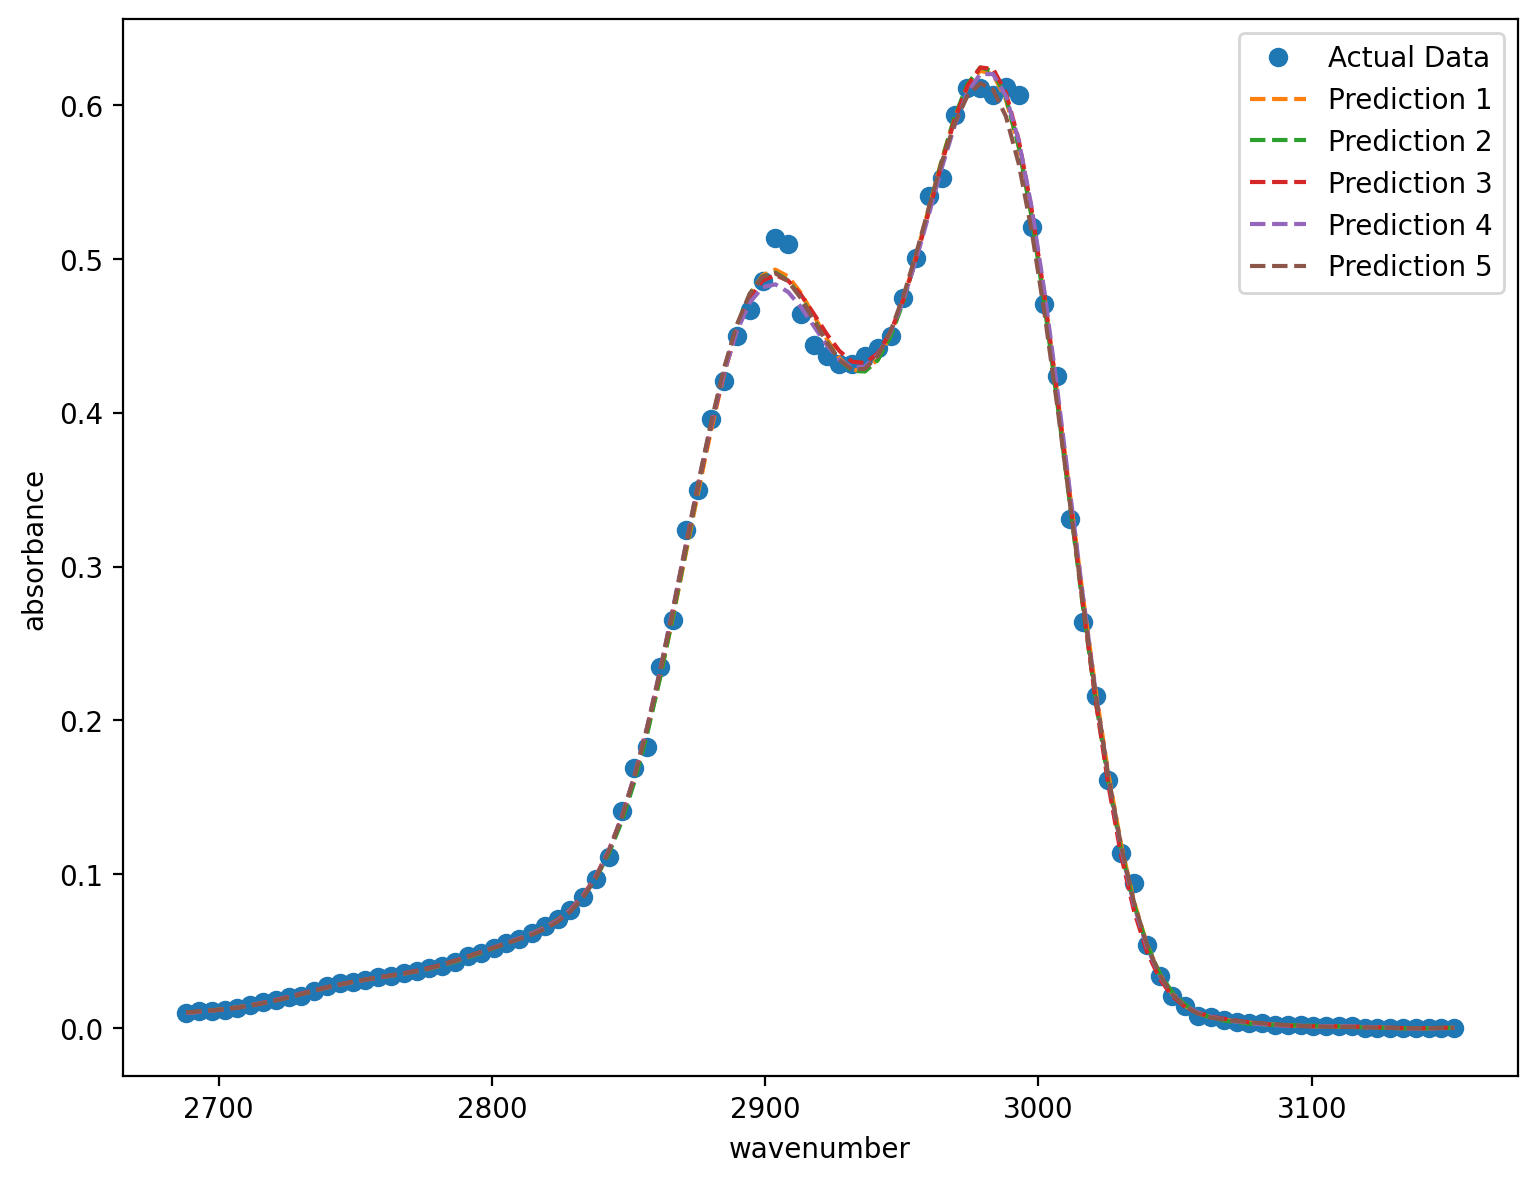

In [19]:
fig, ax = plt.subplots(figsize = (9, 7), dpi = 200)

ax.plot(x_peak, y_peak, 'o', label = 'Actual Data')
for i in range(5):
    ax.plot(x_peak, yhatList[i], '--', label = 'Prediction {}'.format(i + 1))
ax.set_xlabel('wavenumber')
ax.set_ylabel('absorbance')
ax.legend()
plt.show()

**Plot the standard deviation of the 5 KRR model predictions as a function of wavenumber.**

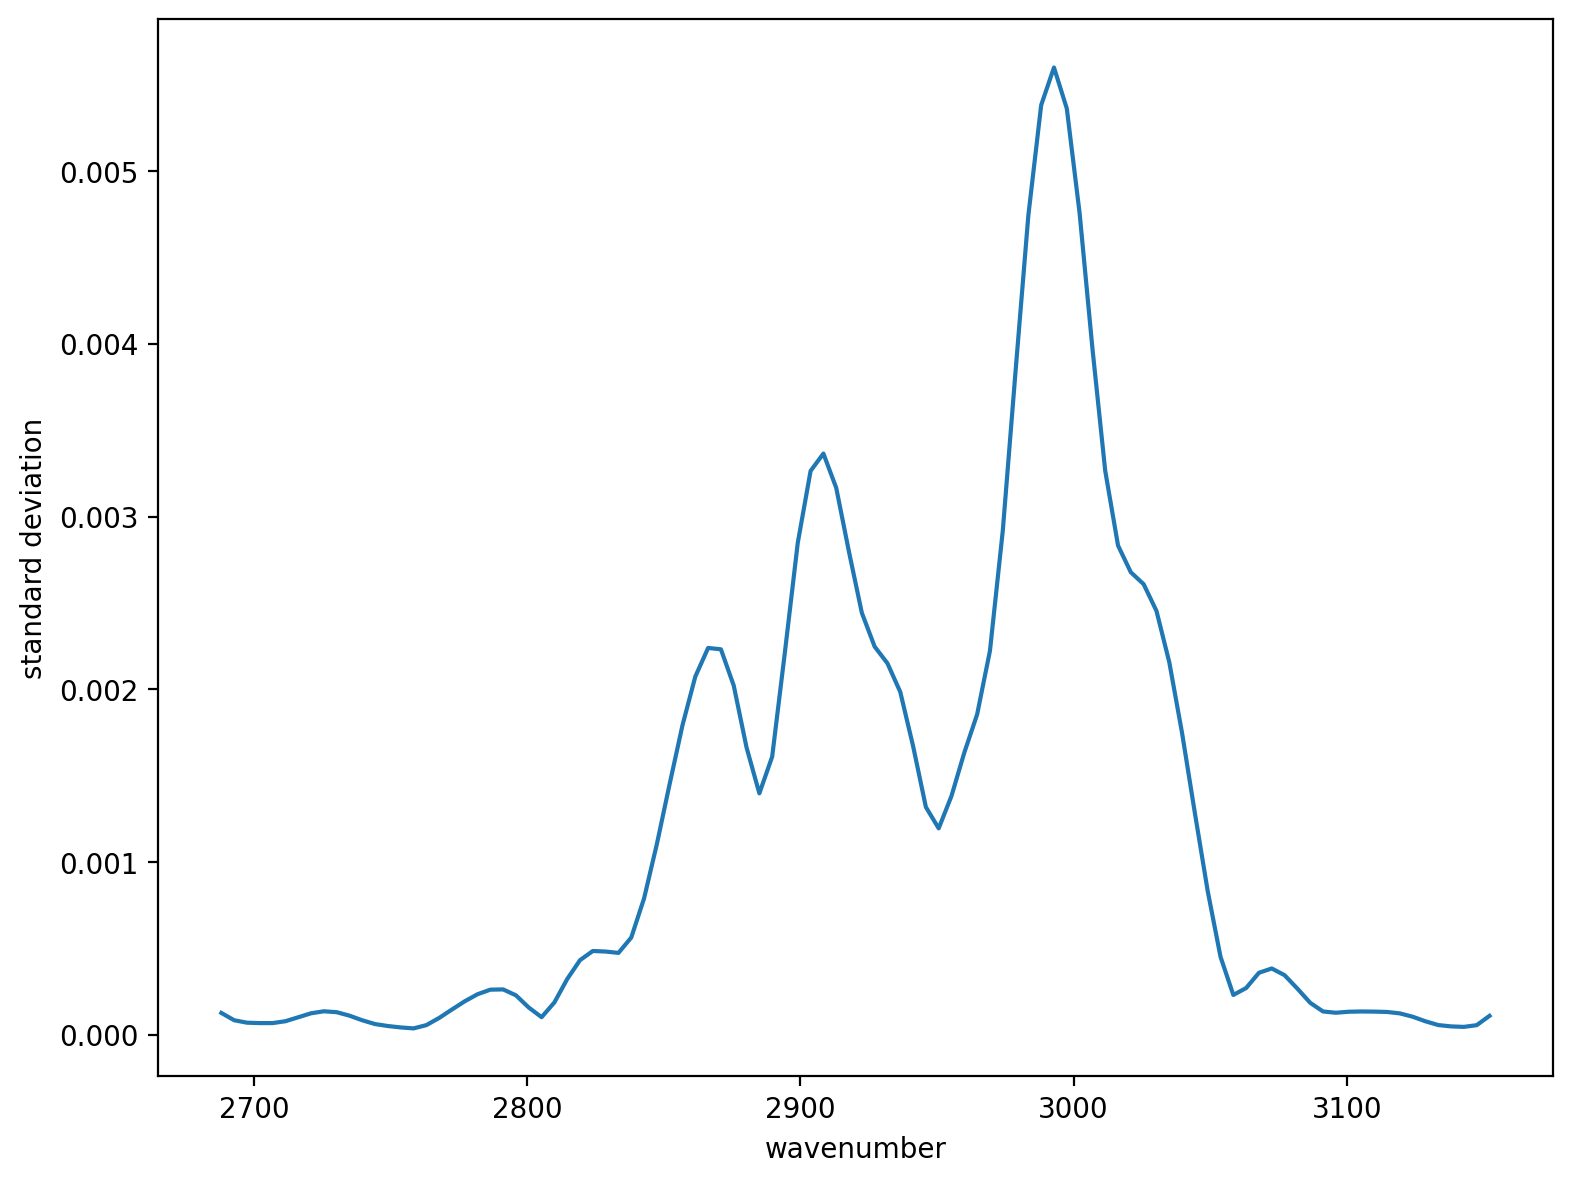

In [20]:
yhatList = np.array(yhatList)
std = yhatList.std(axis = 0)

fig, ax = plt.subplots(figsize = (9, 7), dpi = 200)
ax.plot(x_peak, std)
ax.set_xlabel('wavenumber')
ax.set_ylabel('standard deviation')
plt.show()

**Is the predicted error homoscedastic? Briefly explain.**

No, it's not.

No, it's not.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Distribution-of-Features" data-toc-modified-id="Distribution-of-Features-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Distribution of Features</a></span></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature Scaling</a></span></li><li><span><a href="#LASSO-Regression" data-toc-modified-id="LASSO-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>LASSO Regression</a></span></li><li><span><a href="#Principal-Component-and-Forward-Selection" data-toc-modified-id="Principal-Component-and-Forward-Selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Principal Component and Forward Selection</a></span></li></ul></div>

# Regression - Assignment 5

Data and Package Import

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt

In [2]:
df = pd.read_excel('data/impurity_dataset-training.xlsx')

def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True
    
all_data = df[df.columns[1:]].values
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
real_rows = numeric_map.all(axis = 1).copy().values
X = np.array(all_data[real_rows, :-5], dtype = 'float')
y = np.array(all_data[real_rows, -3], dtype = 'float')
y = y.reshape(-1, 1)

print('X matrix dimensions: {}'.format(X.shape))
print('y matrix dimensions: {}'.format(y.shape))

X matrix dimensions: (10297, 40)
y matrix dimensions: (10297, 1)


## Distribution of Features

**Plot histograms of all 40 features.**

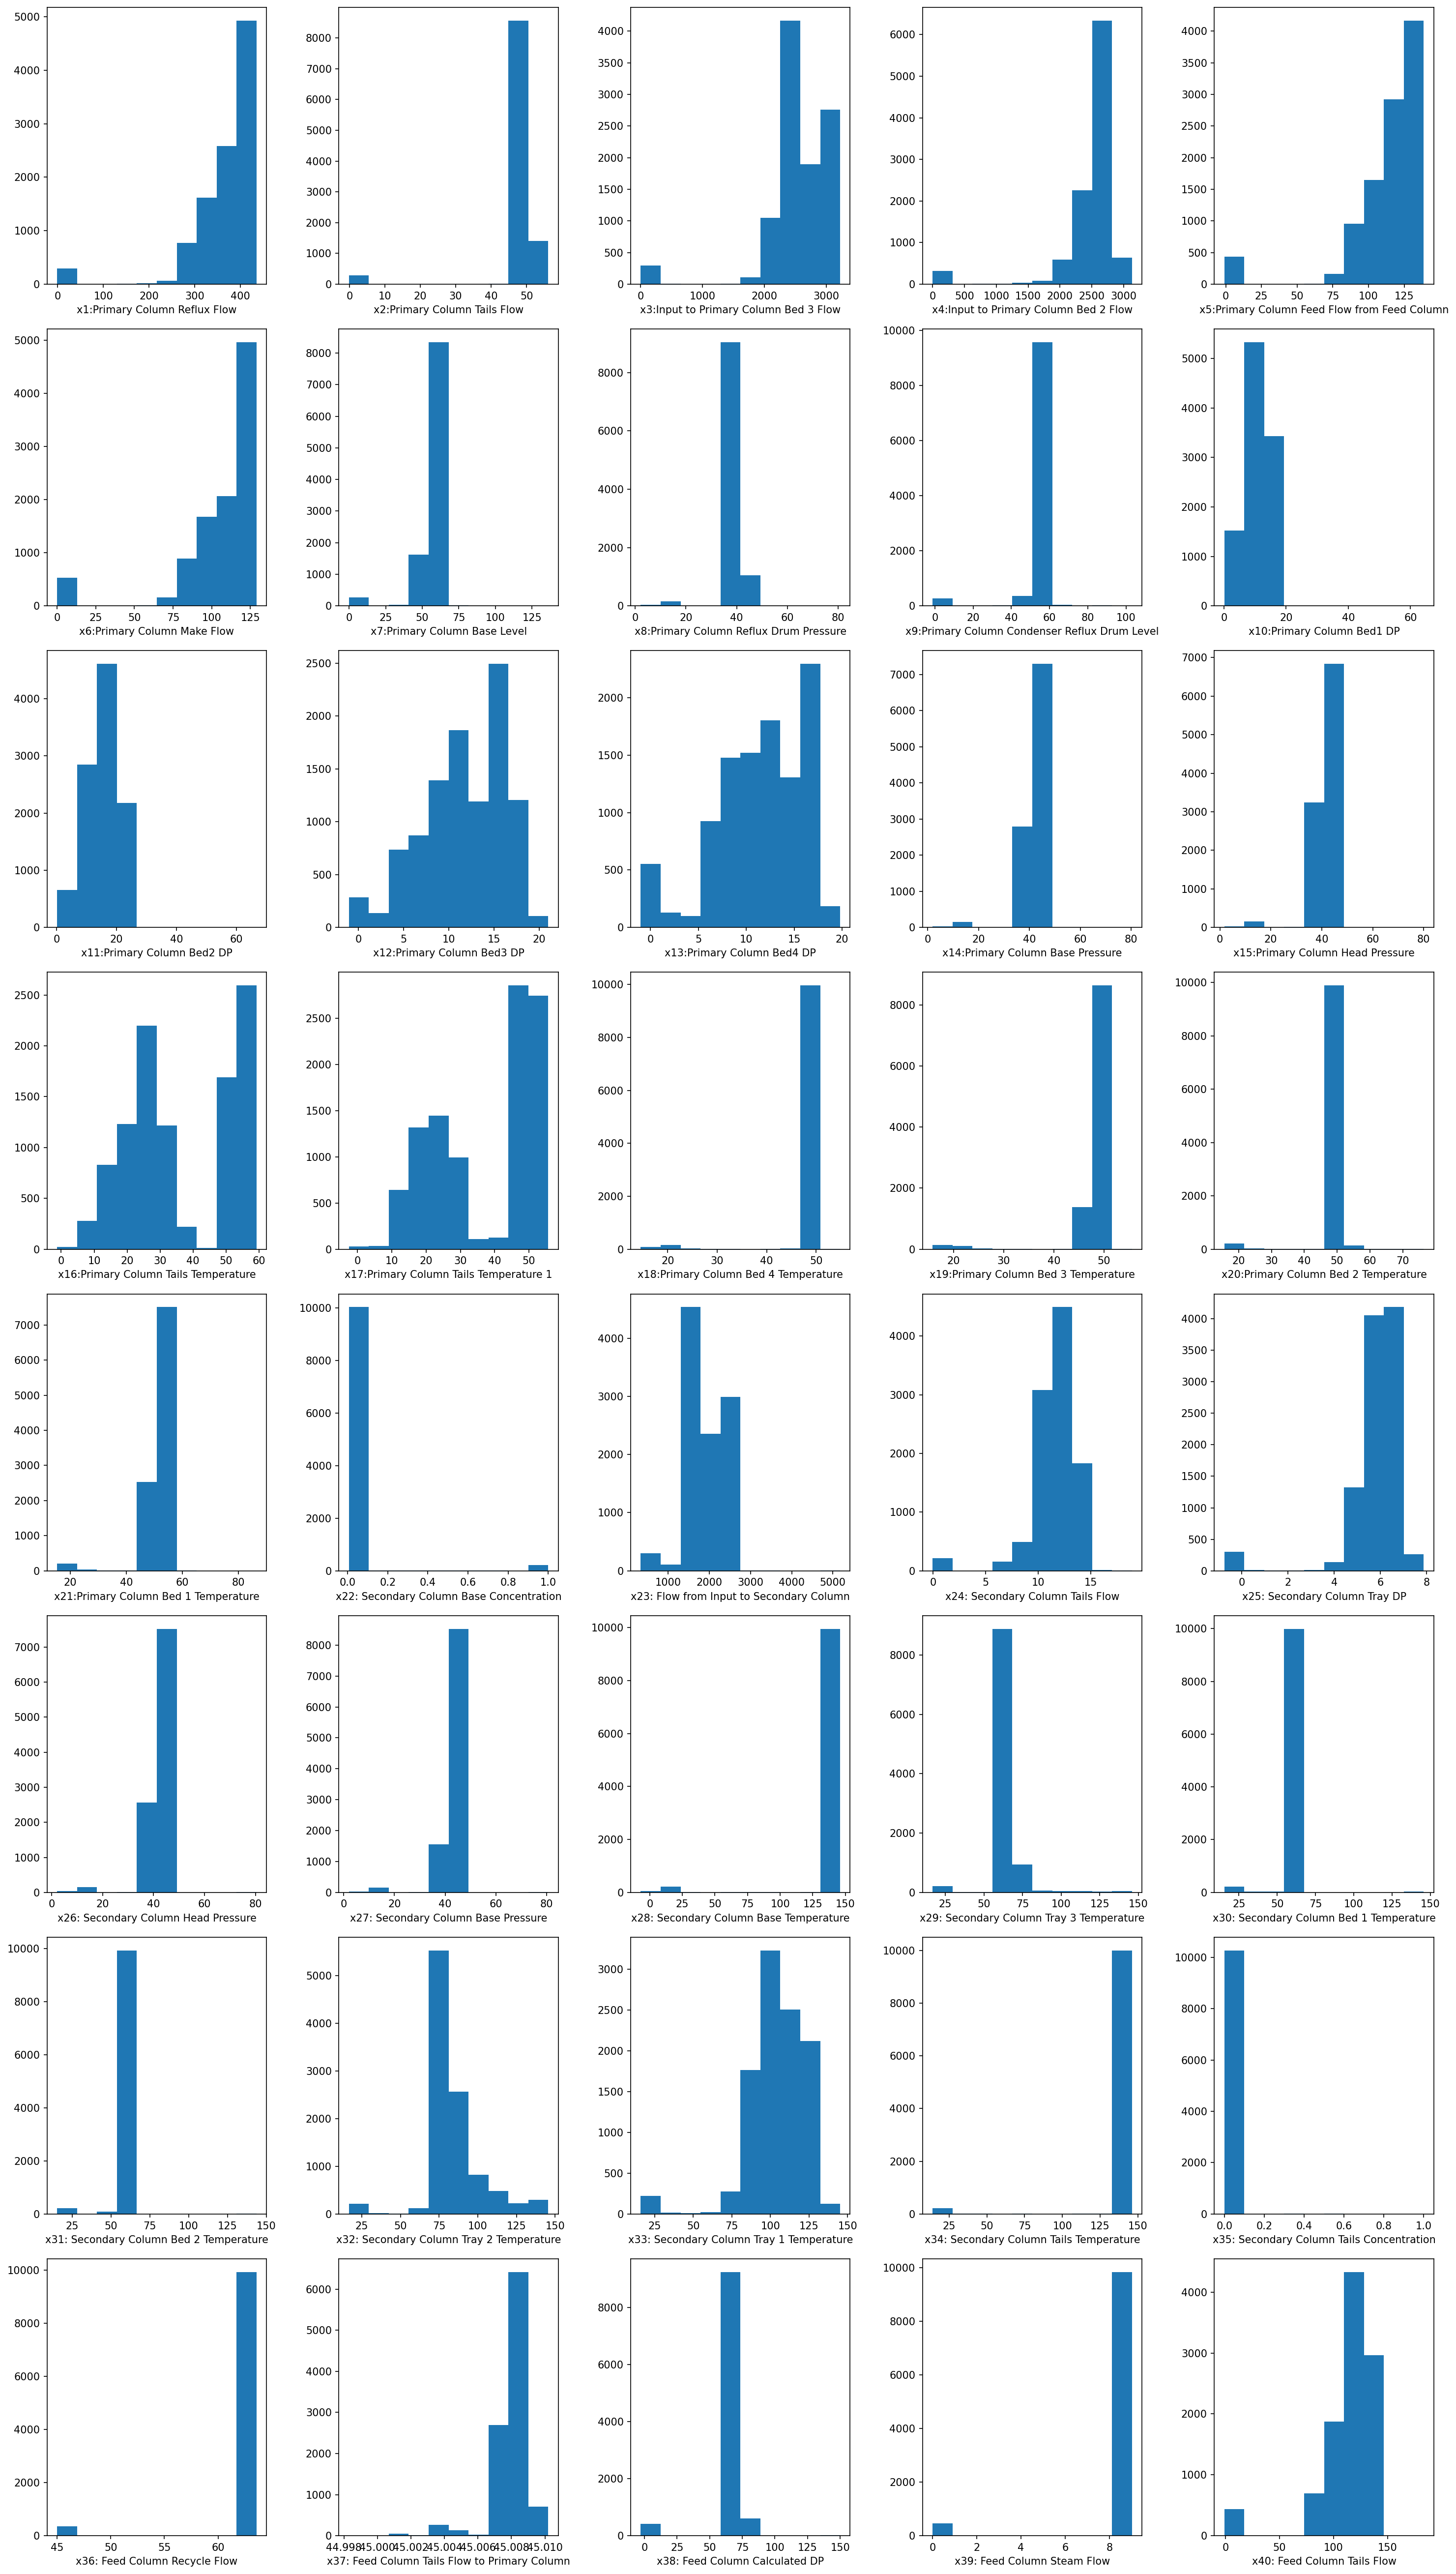

In [3]:
fig, axes = plt.subplots(8, 5, figsize = (20, 35), dpi = 150)
axes = axes.ravel()

col_names = df.columns[1:-5] # Extract the names of columns

for i, col in enumerate(col_names): # We know that the length of col_names is 40 such that i will iterate from 0 to 39
    axes[i].hist(X[:, i]) # Plot the histogram of i-th column of the X matrix
    axes[i].set_xlabel(col) # Write the name of column below the x-axis
    
plt.tight_layout() # Makes the plot look nicer

**Name a feature that is approximately normally distributed.**

You may use visual inspection to answer the following questions.

- x10
- x11
- x24
- x25
- x33
- etc.

**Name a feature that is approximately bimodally distributed.**

- x3
- x12
- x16
- x17
- etc.

**Name a feature that has significant outliers.**

- x1
- x2
- x3
- x4
- x5
- etc.

## Feature Scaling

**Down-sample the dataset by selecting every 10th data point.**

In [4]:
X_down = X[::10]
y_down = y[::10]

**Do a train/test split with `test_size=0.3`.**

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_down, y_down, test_size = 0.3)

**Use the standard scaler and make the standardized dataset.**

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
# X_train_scaled = scaler.fit_transform(X_train) : fit_transform method does fit and transform at once and returns the scaled data
X_test_scaled = scaler.transform(X_test)

**Build a KRR model on the Dow dataset with and without scaling.**

Set $\gamma$=0.01 and $\alpha$=0.01.

In [7]:
from sklearn.kernel_ridge import KernelRidge

krr = KernelRidge(gamma = 0.01, kernel = 'rbf', alpha = 0.01)

krr.fit(X_train, y_train)
r2_wo_scaling = krr.score(X_test, y_test)

krr.fit(X_train_scaled, y_train)
r2_w_scaling = krr.score(X_test_scaled, y_test)

**Compare the $r^2$ score on the test set of the two approaches.**

In [8]:
print('r2 score before scaling: {}'.format(r2_wo_scaling))
print('r2 score after scaling: {}'.format(r2_w_scaling))

r2 score before scaling: -5.403858421106995
r2 score after scaling: 0.7466147313077132


## LASSO Regression

**Note**  
Technically, we cannot scale the `X` matrix before doing `GridSearchCV`, which is the same issue we have faced in the last assignment. We do cross-validation during `GridSearchCV` (which is 3 different train/test split) such that scaling before `GridSearchCV` will cause data leakage. Data leakage basically means that partial or entire information of the test set leaks into the training set. In this case, we need means and standard deviations of features to scale the matrix. If we include the test set during scaling, the means and standard deviations will include the test data points, which we refer to as data leakage.  

Same as last week, we will accept the answer simply following the instructions. However, you may want to think about why scaling before `GridSearchCV` is improper. The ideal way to approach this problem is to construct a `pipeline`. I know we did not cover the concept of the `pipeline`. You can consider this as a wrapper function that we covered during the autograd package. You can build a workflow by plugging multiple functions or models into a single `pipeline` model. Then, this `pipeline` will perform each function or model step by step for each train/test set or cross-validation. I will show a brief way to solve this problem using the `pipeline` in this solution. Since handling a `pipeline` model is beyond the scope of this course, we will not ask you to use a `pipeline` in the mid-term exam or the following assignments.


**Scale the feature matrix using the standard scaler.**

In [9]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_down)

**Shuffle the data.**

In [10]:
from sklearn.utils import shuffle

X_scaled_shuffle, y_shuffle = shuffle(X_scaled, y_down)

**Build a `GridSearchCV` model that optimizes the hyperparameters of a LASSO model.**

Search over $\alpha \in$ [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1].

Use 3-fold cross-validation.

In [11]:
# Useful command if you want to get rid of red boxes

import warnings
warnings.simplefilter('ignore')

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
param_grid = {'alpha': alphas}

LASSO = Lasso()

lasso_search = GridSearchCV(LASSO, param_grid, cv = 3)
lasso_search.fit(X_scaled_shuffle, y_shuffle)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]})

**Evaluate the performance of the best model.**

Print the optimized $\alpha$ as well as the $r^2$ score.

In [13]:
print('Optimal alpha: {}'.format(lasso_search.best_estimator_.alpha))
print('Best r2 score: {}'.format(lasso_search.best_score_))

Optimal alpha: 0.01
Best r2 score: 0.6775360697195154


**Describe which features (if any) were dropped.**

Dropped features have coefficients equal to zero.

In [14]:
coeffs = lasso_search.best_estimator_.coef_
zero_coeffs = col_names[coeffs == 0]
print(zero_coeffs)

Index(['x1:Primary Column Reflux Flow', 'x2:Primary Column Tails Flow',
       'x3:Input to Primary Column Bed 3 Flow',
       'x8:Primary Column Reflux Drum Pressure', 'x12:Primary Column Bed3 DP',
       'x13:Primary Column Bed4 DP', 'x14:Primary Column Base Pressure',
       'x15:Primary Column Head Pressure',
       'x18:Primary Column Bed 4 Temperature',
       'x19:Primary Column Bed 3 Temperature',
       'x20:Primary Column Bed 2 Temperature',
       'x21:Primary Column Bed 1 Temperature',
       'x26: Secondary Column Head Pressure',
       'x27: Secondary Column Base Pressure',
       'x29: Secondary Column Tray 3 Temperature',
       'x30: Secondary Column Bed 1 Temperature',
       'x31: Secondary Column Bed 2 Temperature',
       'x33: Secondary Column Tray 1 Temperature',
       'x34: Secondary Column Tails Temperature',
       'x35: Secondary Column Tails Concentration',
       'x38: Feed Column Calculated DP', 'x40: Feed Column Tails Flow'],
      dtype='object')


**Solution using the `pipeline`**

In [15]:
from sklearn.pipeline import Pipeline

X_down_shuffle, y_down_shuffle = shuffle(X_down, y_down) # Shuffle unscaled X_down and y_down

pipeline = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())]) # We made a pipeline of two steps: 1. do standard scaling 2. train a LASSO model
param_grid = dict(lasso__alpha = alphas) # Set a parameter grid for the LASSO model (I know the naming is weird)

pipeline_search = GridSearchCV(pipeline, param_grid, cv = 3)
pipeline_search.fit(X_down_shuffle, y_down_shuffle)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]})

In [16]:
print('Optimal alpha: {}'.format(pipeline_search.best_params_))
print('Best r2 score: {}'.format(pipeline_search.best_score_))

Optimal alpha: {'lasso__alpha': 0.01}
Best r2 score: 0.6808773020225871


In [17]:
coeffs_pipeline = pipeline_search.best_estimator_['lasso'].coef_
zero_coeffs_pipeline = col_names[coeffs_pipeline == 0]
print(zero_coeffs_pipeline)

Index(['x1:Primary Column Reflux Flow', 'x2:Primary Column Tails Flow',
       'x3:Input to Primary Column Bed 3 Flow',
       'x8:Primary Column Reflux Drum Pressure', 'x12:Primary Column Bed3 DP',
       'x13:Primary Column Bed4 DP', 'x14:Primary Column Base Pressure',
       'x15:Primary Column Head Pressure',
       'x18:Primary Column Bed 4 Temperature',
       'x19:Primary Column Bed 3 Temperature',
       'x20:Primary Column Bed 2 Temperature',
       'x21:Primary Column Bed 1 Temperature',
       'x26: Secondary Column Head Pressure',
       'x27: Secondary Column Base Pressure',
       'x29: Secondary Column Tray 3 Temperature',
       'x30: Secondary Column Bed 1 Temperature',
       'x31: Secondary Column Bed 2 Temperature',
       'x33: Secondary Column Tray 1 Temperature',
       'x34: Secondary Column Tails Temperature',
       'x35: Secondary Column Tails Concentration',
       'x38: Feed Column Calculated DP', 'x40: Feed Column Tails Flow'],
      dtype='object')


## Principal Component and Forward Selection

**Use the eigenvalues of the covariance matrix to perform PCA on the scaled feature matrix.**

*Hint: You can check your answers using PCA from `scikit-learn` or other packages if you want*

In [18]:
from scipy.linalg import eigvals, eig

corr = np.corrcoef(X_down.T) # You can use either the X_down or the original X. Here, I will use the X_down for the sake of simplicity.
# corr = np.cov(X_scaled.T)
PCvals, PCvecs = eig(corr)
PC_projection = np.dot(X_scaled, PCvecs)

**Determine which principal component of the dataset is most linearly correlated with the impurity concentration.**

Print the order of the principal component (e.g. 5th PC) and its $r^2$ score.

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

r2List = []

for i in range(PC_projection.shape[1]):
    lr.fit(PC_projection[:, i:i+1], y_down)
    r2 = lr.score(PC_projection[:, i:i+1], y_down)
    r2List.append((r2, i))
    
r2List.sort()
r2max = r2List[-1][0]
PCmax = r2List[-1][1]

print('Most linearly correlated PC: {}th PC'.format(PCmax + 1))
print('Maximum r2 score: {}'.format(r2max))

Most linearly correlated PC: 2th PC
Maximum r2 score: 0.22304172376486353


**Determine which original feature of the dataset is most linearly correlated to the impurity concentration.**

Print the name of the feature and its $r^2$ score.

In [20]:
r2List = []

for i in range(X_scaled.shape[1]):
    lr.fit(X_scaled[:, i:i+1], y_down)
    r2 = lr.score(X_scaled[:, i:i+1], y_down)
    r2List.append((r2, i))
    
r2List.sort()
r2max = r2List[-1][0]
featuremax = r2List[1][1]

print('Most lienarly correlated feature: {}'.format(col_names[featuremax]))
print('Maximum r2 score: {}'.format(r2max))

Most lienarly correlated feature: x25: Secondary Column Tray DP
Maximum r2 score: 0.5436900094204682


# Classification - Assignment 6

## Data and Package Import

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt

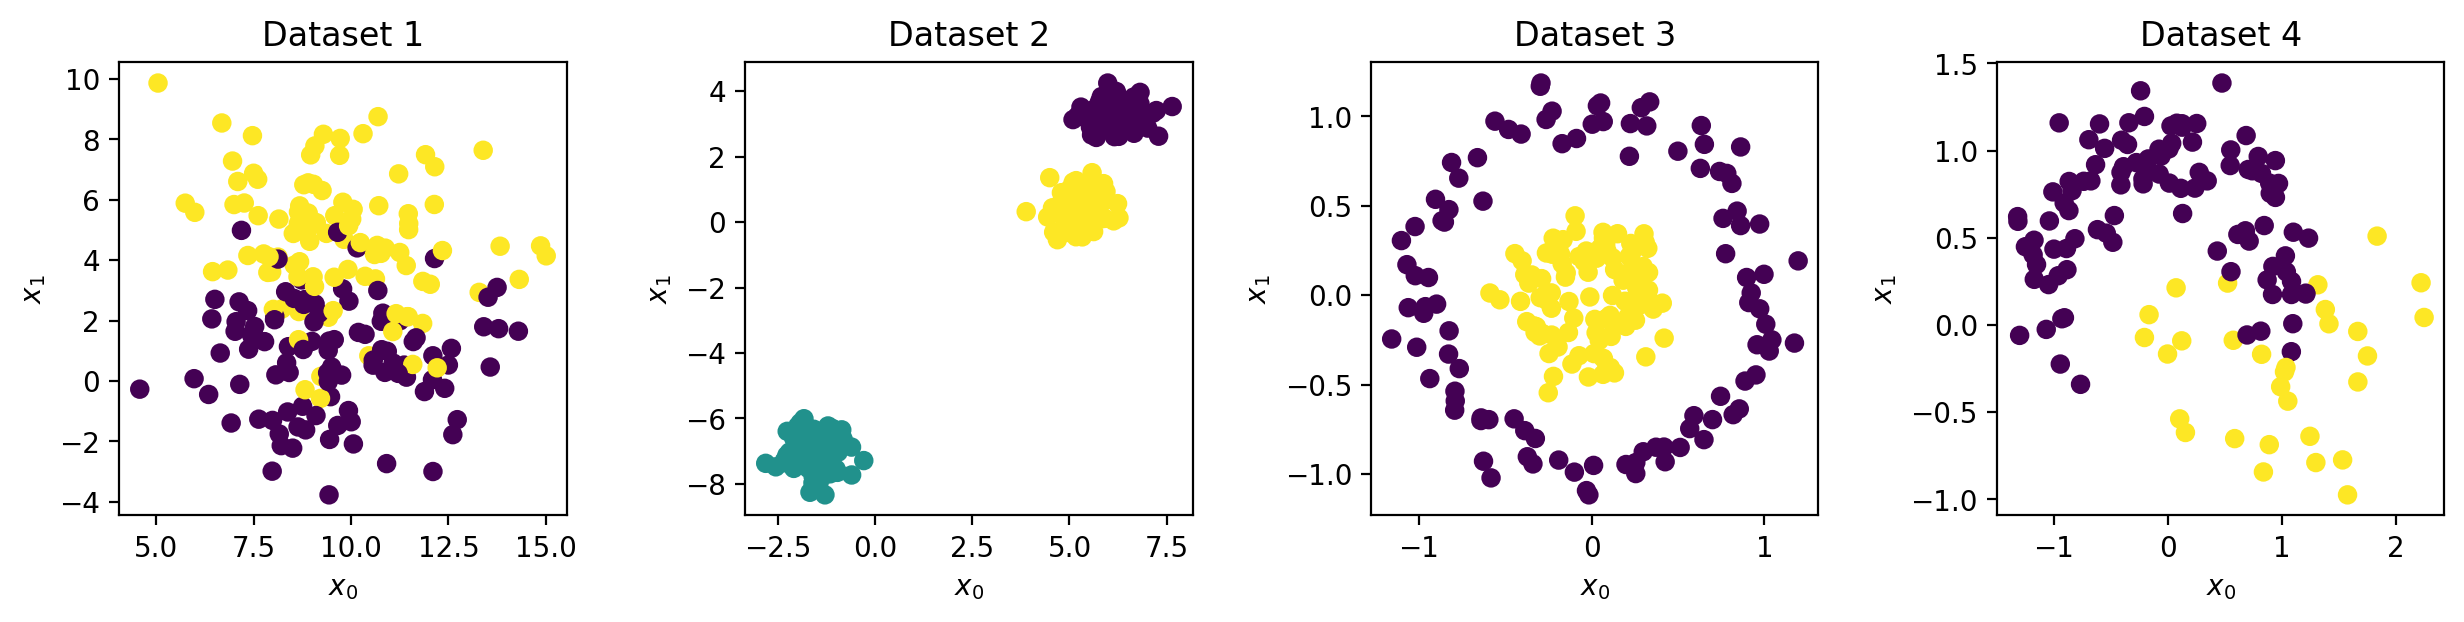

In [2]:
from sklearn.datasets import make_blobs, make_moons, make_circles
np.random.seed(4)

noisiness = 1

X_blob, y_blob = make_blobs(n_samples = 200, centers = 2, cluster_std = 2 * noisiness, n_features = 2)

X_mc, y_mc = make_blobs(n_samples = 200, centers = 3, cluster_std = 0.5 * noisiness, n_features = 2)

X_circles, y_circles = make_circles(n_samples = 200, factor = 0.3, noise = 0.1 * noisiness)

X_moons, y_moons = make_moons(n_samples = 200, noise = 0.25 * noisiness)

N_include = 30
idxs = []
Ni = 0
for i, yi in enumerate(y_moons):
    if yi == 1 and Ni < N_include:
        idxs.append(i)
        Ni += 1
    elif yi == 0:
        idxs.append(i)

y_moons = y_moons[idxs]
X_moons = X_moons[idxs]

fig, axes = plt.subplots(1, 4, figsize = (15, 3), dpi = 200)

all_datasets = [[X_blob, y_blob], [X_mc, y_mc], [X_circles, y_circles], [X_moons, y_moons]]

labels = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']
for i, Xy_i in enumerate(all_datasets):
    Xi, yi = Xy_i
    axes[i].scatter(Xi[:, 0], Xi[:, 1], c = yi)
    axes[i].set_title(labels[i])
    axes[i].set_xlabel('$x_0$')
    axes[i].set_ylabel('$x_1$')

fig.subplots_adjust(wspace = 0.4);

## 1. Discrimination Lines

**Derive the equation for the line that discriminates between the two classes.**

Consider a model of the form:

$\bar{\bar{X}}\vec{w} > 0$ if $y_i=1$ (class 1)

$\bar{\bar{X}}\vec{w} < 0$ if $y_i=-1$ (class 2)

where $\bar{\bar{X}} = [\vec{x_0}, \vec{x_1}, \vec{1}]$ and $\vec{w} = [w_0, w_1, w_2]$.

The equation should be in the form of $x_1 = f(x_0)$. Show your work, and/or explain the process you used to arrive at the answer.

> The discrimination line will be drawn where $\bar{\bar{X}}\vec{w}$=0.  
</br>  
$\bar{\bar{X}}\vec{w}$ = $w_0 x_0$ + $w_1 x_1$ + $w_2$=0  
</br>  
$\therefore x_1 = -\frac{w_0}{w_1}x_0 - \frac{w_2}{w_1}$

**Derive the discrimination line for a related non-linear model**

In this case, consider a model defined by:

$y_i = w_0 x_0 + w_1 x_1 + w_2 (x_0^2 + x_1^2)$

where the model predicts class 1 if $y_i > 0$ and predicts class 2 if $y_i \leq 0$.

The equation should be in the form of $x_1 = f(x_0)$. Show your work, and/or explain the process you used to arrive at the answer.

> Discrimination line: $w_0 x_0 + w_1 x_1 + w_2 (x^{2}_{0} + x^{2}_{1})$ = 0  
</br>  
$w_2 x^{2}_{1} + w_1 x_1 + w_2 x^{2}_{0} + w_0 x_0$ = 0  
</br>  
$x^{2}_{1} + \frac{w_1}{w_2} x_1 = -x^{2}_{0} - \frac{w_0}{w_2} x_0$  
</br>  
$\left(x_1 + \frac{w_1}{2w_2}\right)^2 = -x_0\left(x_0 + \frac{w_0}{w_2}\right) + \frac{w^{2}_{1}}{4w^{2}_{2}}$  
</br>  
$\therefore x_1 = \pm\sqrt{-x_0\left(x_0 + \frac{w_0}{w_2}\right) + \frac{w^{2}_{1}}{4w^{2}_{2}}} - \frac{w_1}{2w_2}$

**Briefly describe the nature of this boundary.**

What is the shape of the boundary? Is it linear or non-linear?

> 1-1. Shape of the boundary: straight line and linear  
</br>  
1-2. Shape of the boundary: circle and non-linear

## 2. Assessing Loss Functions

In [3]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    X_intercept = np.append(intercept, X, 1)
    return X_intercept

In [4]:
def linear_classifier(X, w):
    X_intercept = add_intercept(X)
    p = np.dot(X_intercept, w)
    return p > 0

**Write a function that computes the loss function for the perceptron model.**

The function should take the followings as arguments:
- weight vector $w$
- the feature matrix $\bar{\bar{X}}$
- the output vector $\vec{y}$

You may want to use functions above.

In [5]:
def perceptron(w, X, y):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept, w)
    loss = sum(np.maximum(0, -y*Xb))
    
    return loss

**Write a function that computes the loss function for the logistic regression model.**

The function should take the followings as arguments:
- weight vector $w$
- the feature matrix $\bar{\bar{X}}$
- the output vector $\vec{y}$

You may want to use functions above.

In [6]:
def log_reg(w, X, y):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept, w)
    exp_yXb = np.exp(-y * Xb)
    loss = sum(np.log(1 + exp_yXb))
    
    return loss

**Minimize the both loss functions using the Dataset 3 above.**

In [7]:
from scipy.optimize import minimize

w = [-10, -4, -10]

result_perceptron = minimize(perceptron, w, args = (X_circles, 2 * y_circles - 1))
result_log_reg = minimize(log_reg, w, args = (X_circles, 2 * y_circles - 1))

**What is the value of the loss function for the perceptron model after optimization?**

In [8]:
w_perceptron = result_perceptron.x
loss_perceptron = perceptron(w_perceptron, X_circles, 2 * y_circles - 1)
print(loss_perceptron)

1.723441663333635e-07


**What is the value of the loss function for the logistic regression model after optimization?**

In [9]:
w_log_reg = result_log_reg.x
loss_log_reg = log_reg(w_log_reg, X_circles, 2 * y_circles - 1)
print(loss_log_reg)

138.60070170523946


**What are the two main challenges of the perceptron loss function?**

> - non-differentiable at w = $\vec{0}$  
- trivial solution at w = $\vec{0}$

## 3. Support Vector Machine

**Write a function that computes the loss function of the support vector machine model.**

This functions should take the followings as arguments:

- weight vector $w$
- the feature matrix $\bar{\bar{X}}$
- the output vector $\vec{y}$
- regularization strength $\alpha$

You may want to use `add_intercept` and `linear_classifier` functions from the Problem 2.

In [10]:
def svm(w, X, y, alpha):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept, w)
    loss = sum(np.maximum(0, 1 - y*Xb))
    loss += alpha * np.linalg.norm(w[1:], 2)
    
    return loss

**Evaluate the effect of regularization strength.**

Optimize the SVM model for **Dataset 1**.

Search over $\alpha$ = [0, 1, 2, 10, 100] and assess the loss function of the SVM model.

In [11]:
alphas = [0, 1, 2, 10, 100]

for alpha in alphas:
    result_svm = minimize(svm, w, args = (X_blob, 2 * y_blob - 1, alpha))
    w_svm = result_svm.x
    
    loss_svm = svm(w_svm, X_blob, 2 * y_blob - 1, alpha)
    print('Value of loss function with alpha = {}: {}'.format(alpha, loss_svm))

Value of loss function with alpha = 0: 74.19151063967898
Value of loss function with alpha = 1: 74.9684059609181
Value of loss function with alpha = 2: 75.7625348368162
Value of loss function with alpha = 10: 81.69977723457326
Value of loss function with alpha = 100: 127.00264726004937


**Plot the discrimination lines for $\alpha$ = [0, 1, 2, 10, 100].**

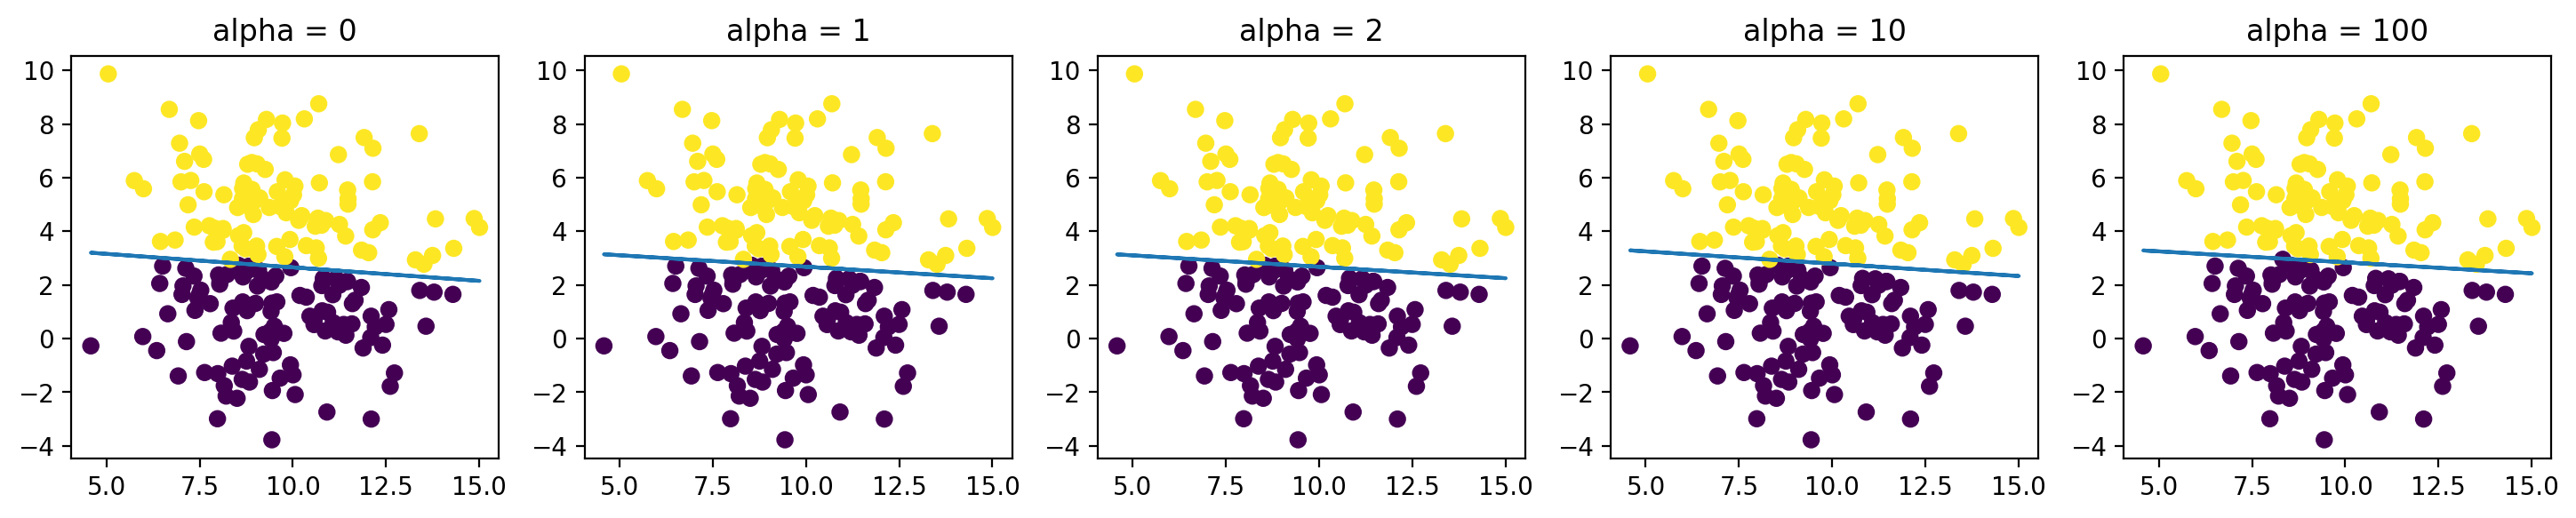

In [12]:
fig, axes = plt.subplots(1, 5, figsize = (18, 3), dpi = 200)

for i, alpha in enumerate(alphas):
    result_svm = minimize(svm, w, args = (X_blob, 2 * y_blob - 1, alpha))
    w_svm = result_svm.x
    
    prediction = linear_classifier(X_blob, w_svm)
    
    m = -w_svm[1] / w_svm[2]
    b = -w_svm[0] / w_svm[2]
    
    axes[i].scatter(X_blob[:, 0], X_blob[:, 1], c = prediction)
    axes[i].plot(X_blob[:, 0], m * X_blob[:, 0] + b, '-')
    
    axes[i].set_title('alpha = {}'.format(alpha))

**Find the optimal set of hyperparameters for an SVM model with Dataset 1.**

Use `GridSearchCV` and find the optimal value of $\alpha$ and $\gamma$.

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel = 'rbf')

# Note that candidates of gamma are not provided so please be aware of this when you do your peer review
# Focus on the process how your classmates approached this problem, not on the final result

# I will set a simple list of sigmas and transform it to a list of gammas
sigmas = np.linspace(5, 50, 10)
gammas = 1. / sigmas

Cs = 1. / np.array(alphas[1:])

param_grid = {'gamma': gammas, 'C': Cs}

# You can do train/test split before GridSearchCV
# In this solution, I won't
# Make sure that you have to shuffle the data before GridSearchCV unless you do train/test split

from sklearn.utils import shuffle

X_shuffle, y_shuffle = shuffle(X_blob, y_blob)

svm_search = GridSearchCV(svc, param_grid, cv = 3)
svm_search.fit(X_shuffle, y_shuffle)

opt_C = svm_search.best_estimator_.C
opt_gamma = svm_search.best_estimator_.gamma

print('Optimal C: {}'.format(opt_C))
print('Optimal gamma: {}'.format(opt_gamma))

Optimal C: 1.0
Optimal gamma: 0.2


**Calculate the accruacy, precision, and recall for the best model.**

You can write your own function that calculates the metrics or you may use built-in functions.

In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

print('Accuracy: {}'.format(accuracy_score(y_blob, svm_search.best_estimator_.predict(X_blob))))
print('Precision: {}'.format(precision_score(y_blob, svm_search.best_estimator_.predict(X_blob))))
print('Recall: {}'.format(recall_score(y_blob, svm_search.best_estimator_.predict(X_blob))))

Accuracy: 0.87
Precision: 0.9021739130434783
Recall: 0.83


**Plot the confusion matrix.**

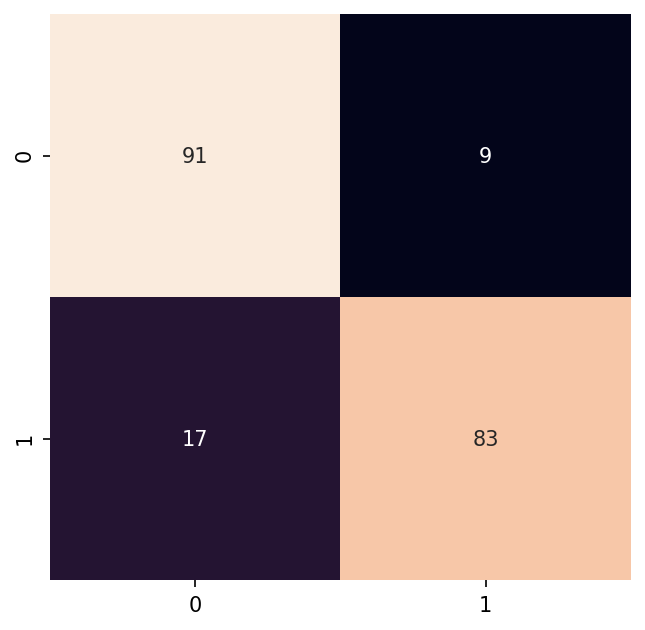

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_blob, svm_search.best_estimator_.predict(X_blob))

fig, ax = plt.subplots(figsize = (5, 5), dpi = 150)
sns.heatmap(cm, annot = True, ax = ax, cbar = False);

**What happens to the decision boundary as $\alpha$ goes to $\infty$?**

> The weights will be over-regularized such that the boundary will be a straight line.

**What happens to the decision boundary as $\gamma$ goes to 0?**

> If $\gamma$ goes to 0, each element in RBF kernel will be just 1. This means that data points become indistinguishable even though they are far from each other. As a result, the boundary will enclose all the data points.

## 4. 6745 Only: Analytical Derivation

**Derive an analytical expression for the gradient of the softmax function with respect to $\vec{w}$.**

The **softmax** loss function is defined as:

$g(\vec{w}) = \sum_i log(1 + \exp{(-y_i \vec{x}_i^T \vec{w}}))$

where $\vec{x}_i$ is the $i$-th row of the input matrix $\bar{\bar{X}}$.

*Hint 1: The function $g(\vec{w})$ can be expressed as $f(r(s(\vec{w})))$ where $r$ and $s$ are arbitrary functions and the chain rule can be applied.*

*Hint 2: You may want to review Ch. 4 of "Machine Learning Refined, 1st Ed."*

> $log\left\{1 + exp(-y_i\vec{x_i}^T\vec{w})\right\} = f(r(s(\vec{w})))$ where $f(r) = log\left\{r\right\}$, $r(s) = 1 + e^{-s}$, $s(\vec{w})=y_i\vec{x_i}^T\vec{w}$  
</br>  
Using the chain rule,  
</br>  
> $\frac{\partial}{\partial\vec{w}}f(r(s(\vec{w})))=\frac{df}{dr}\cdot\frac{dr}{ds}\cdot\frac{\partial}{\partial\vec{w}}s(\vec{w})=\frac{1}{r}\cdot(-e^{-s})\cdot y_i\vec{x_i}=\frac{1}{1+e^{-y_i\vec{x_i}^T\vec{w}}}\cdot(-e^{-y_i\vec{x_i}^T\vec{w}})\cdot y_i\vec{x_i}$  
</br>  
$\therefore \frac{\partial g(\vec{w})}{\partial \vec{w}}=\sum_i \frac{1}{1+e^{-y_i\vec{x_i}^T\vec{w}}}\cdot(-e^{-y_i\vec{x_i}^T\vec{w}})\cdot y_i\vec{x_i}$

**Optional: Logistic regression from the regression perspective**

An alternate interpretation of classification is that we are performing non-linear regression to fit a **step function** to our data (because the output is whether 0 or 1). Since step functions are not differentiable at the step, a smooth approximation with non-zero derivatives must be used. One such approximation is the *tanh* function:

$\tanh{(x)} = \frac{2}{1 + \exp{(-x)}} - 1$

This leads to a reformulation of the classification problem as:

$\vec{y} = \tanh{(\bar{\bar{X}}\vec{w})}$

Show that this is mathematically equivalent to **logistic regression**, or minimization of the **softmax** cost function.

# Classification - Assignment 6

## Data and Package Import

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt

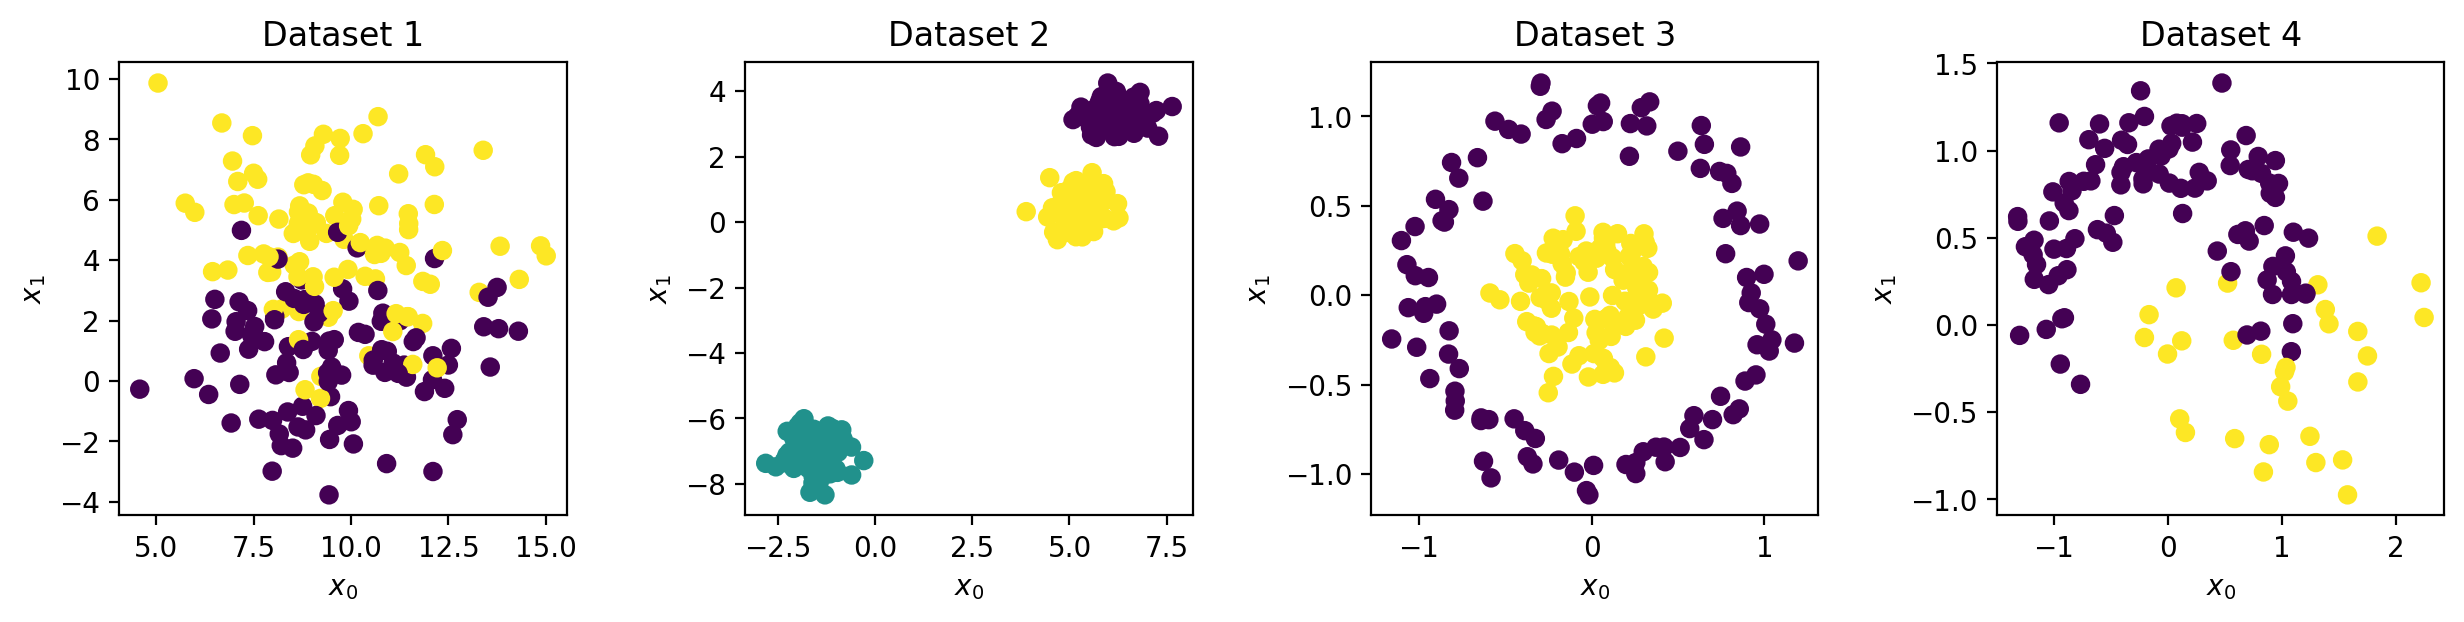

In [2]:
from sklearn.datasets import make_blobs, make_moons, make_circles
np.random.seed(4)

noisiness = 1

X_blob, y_blob = make_blobs(n_samples = 200, centers = 2, cluster_std = 2 * noisiness, n_features = 2)

X_mc, y_mc = make_blobs(n_samples = 200, centers = 3, cluster_std = 0.5 * noisiness, n_features = 2)

X_circles, y_circles = make_circles(n_samples = 200, factor = 0.3, noise = 0.1 * noisiness)

X_moons, y_moons = make_moons(n_samples = 200, noise = 0.25 * noisiness)

N_include = 30
idxs = []
Ni = 0
for i, yi in enumerate(y_moons):
    if yi == 1 and Ni < N_include:
        idxs.append(i)
        Ni += 1
    elif yi == 0:
        idxs.append(i)

y_moons = y_moons[idxs]
X_moons = X_moons[idxs]

fig, axes = plt.subplots(1, 4, figsize = (15, 3), dpi = 200)

all_datasets = [[X_blob, y_blob], [X_mc, y_mc], [X_circles, y_circles], [X_moons, y_moons]]

labels = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']
for i, Xy_i in enumerate(all_datasets):
    Xi, yi = Xy_i
    axes[i].scatter(Xi[:, 0], Xi[:, 1], c = yi)
    axes[i].set_title(labels[i])
    axes[i].set_xlabel('$x_0$')
    axes[i].set_ylabel('$x_1$')

fig.subplots_adjust(wspace = 0.4);

## 1. Discrimination Lines

**Derive the equation for the line that discriminates between the two classes.**

Consider a model of the form:

$\bar{\bar{X}}\vec{w} > 0$ if $y_i=1$ (class 1)

$\bar{\bar{X}}\vec{w} < 0$ if $y_i=-1$ (class 2)

where $\bar{\bar{X}} = [\vec{x_0}, \vec{x_1}, \vec{1}]$ and $\vec{w} = [w_0, w_1, w_2]$.

The equation should be in the form of $x_1 = f(x_0)$. Show your work, and/or explain the process you used to arrive at the answer.

> The discrimination line will be drawn where $\bar{\bar{X}}\vec{w}$=0.  
</br>  
$\bar{\bar{X}}\vec{w}$ = $w_0 x_0$ + $w_1 x_1$ + $w_2$=0  
</br>  
$\therefore x_1 = -\frac{w_0}{w_1}x_0 - \frac{w_2}{w_1}$

**Derive the discrimination line for a related non-linear model**

In this case, consider a model defined by:

$y_i = w_0 x_0 + w_1 x_1 + w_2 (x_0^2 + x_1^2)$

where the model predicts class 1 if $y_i > 0$ and predicts class 2 if $y_i \leq 0$.

The equation should be in the form of $x_1 = f(x_0)$. Show your work, and/or explain the process you used to arrive at the answer.

> Discrimination line: $w_0 x_0 + w_1 x_1 + w_2 (x^{2}_{0} + x^{2}_{1})$ = 0  
</br>  
$w_2 x^{2}_{1} + w_1 x_1 + w_2 x^{2}_{0} + w_0 x_0$ = 0  
</br>  
$x^{2}_{1} + \frac{w_1}{w_2} x_1 = -x^{2}_{0} - \frac{w_0}{w_2} x_0$  
</br>  
$\left(x_1 + \frac{w_1}{2w_2}\right)^2 = -x_0\left(x_0 + \frac{w_0}{w_2}\right) + \frac{w^{2}_{1}}{4w^{2}_{2}}$  
</br>  
$\therefore x_1 = \pm\sqrt{-x_0\left(x_0 + \frac{w_0}{w_2}\right) + \frac{w^{2}_{1}}{4w^{2}_{2}}} - \frac{w_1}{2w_2}$

**Briefly describe the nature of this boundary.**

What is the shape of the boundary? Is it linear or non-linear?

> 1-1. Shape of the boundary: straight line and linear  
</br>  
1-2. Shape of the boundary: circle and non-linear

## 2. Assessing Loss Functions

In [3]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    X_intercept = np.append(intercept, X, 1)
    return X_intercept

In [4]:
def linear_classifier(X, w):
    X_intercept = add_intercept(X)
    p = np.dot(X_intercept, w)
    return p > 0

**Write a function that computes the loss function for the perceptron model.**

The function should take the followings as arguments:
- weight vector $w$
- the feature matrix $\bar{\bar{X}}$
- the output vector $\vec{y}$

You may want to use functions above.

In [5]:
def perceptron(w, X, y):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept, w)
    loss = sum(np.maximum(0, -y*Xb))
    
    return loss

**Write a function that computes the loss function for the logistic regression model.**

The function should take the followings as arguments:
- weight vector $w$
- the feature matrix $\bar{\bar{X}}$
- the output vector $\vec{y}$

You may want to use functions above.

In [6]:
def log_reg(w, X, y):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept, w)
    exp_yXb = np.exp(-y * Xb)
    loss = sum(np.log(1 + exp_yXb))
    
    return loss

**Minimize the both loss functions using the Dataset 3 above.**

In [7]:
from scipy.optimize import minimize

w = [-10, -4, -10]

result_perceptron = minimize(perceptron, w, args = (X_circles, 2 * y_circles - 1))
result_log_reg = minimize(log_reg, w, args = (X_circles, 2 * y_circles - 1))

**What is the value of the loss function for the perceptron model after optimization?**

In [8]:
w_perceptron = result_perceptron.x
loss_perceptron = perceptron(w_perceptron, X_circles, 2 * y_circles - 1)
print(loss_perceptron)

1.723441663333635e-07


**What is the value of the loss function for the logistic regression model after optimization?**

In [9]:
w_log_reg = result_log_reg.x
loss_log_reg = log_reg(w_log_reg, X_circles, 2 * y_circles - 1)
print(loss_log_reg)

138.60070170523946


**What are the two main challenges of the perceptron loss function?**

> - non-differentiable at w = $\vec{0}$  
- trivial solution at w = $\vec{0}$

## 3. Support Vector Machine

**Write a function that computes the loss function of the support vector machine model.**

This functions should take the followings as arguments:

- weight vector $w$
- the feature matrix $\bar{\bar{X}}$
- the output vector $\vec{y}$
- regularization strength $\alpha$

You may want to use `add_intercept` and `linear_classifier` functions from the Problem 2.

In [10]:
def svm(w, X, y, alpha):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept, w)
    loss = sum(np.maximum(0, 1 - y*Xb))
    loss += alpha * np.linalg.norm(w[1:], 2)
    
    return loss

**Evaluate the effect of regularization strength.**

Optimize the SVM model for **Dataset 1**.

Search over $\alpha$ = [0, 1, 2, 10, 100] and assess the loss function of the SVM model.

In [11]:
alphas = [0, 1, 2, 10, 100]

for alpha in alphas:
    result_svm = minimize(svm, w, args = (X_blob, 2 * y_blob - 1, alpha))
    w_svm = result_svm.x
    
    loss_svm = svm(w_svm, X_blob, 2 * y_blob - 1, alpha)
    print('Value of loss function with alpha = {}: {}'.format(alpha, loss_svm))

Value of loss function with alpha = 0: 74.19151063967898
Value of loss function with alpha = 1: 74.9684059609181
Value of loss function with alpha = 2: 75.7625348368162
Value of loss function with alpha = 10: 81.69977723457326
Value of loss function with alpha = 100: 127.00264726004937


**Plot the discrimination lines for $\alpha$ = [0, 1, 2, 10, 100].**

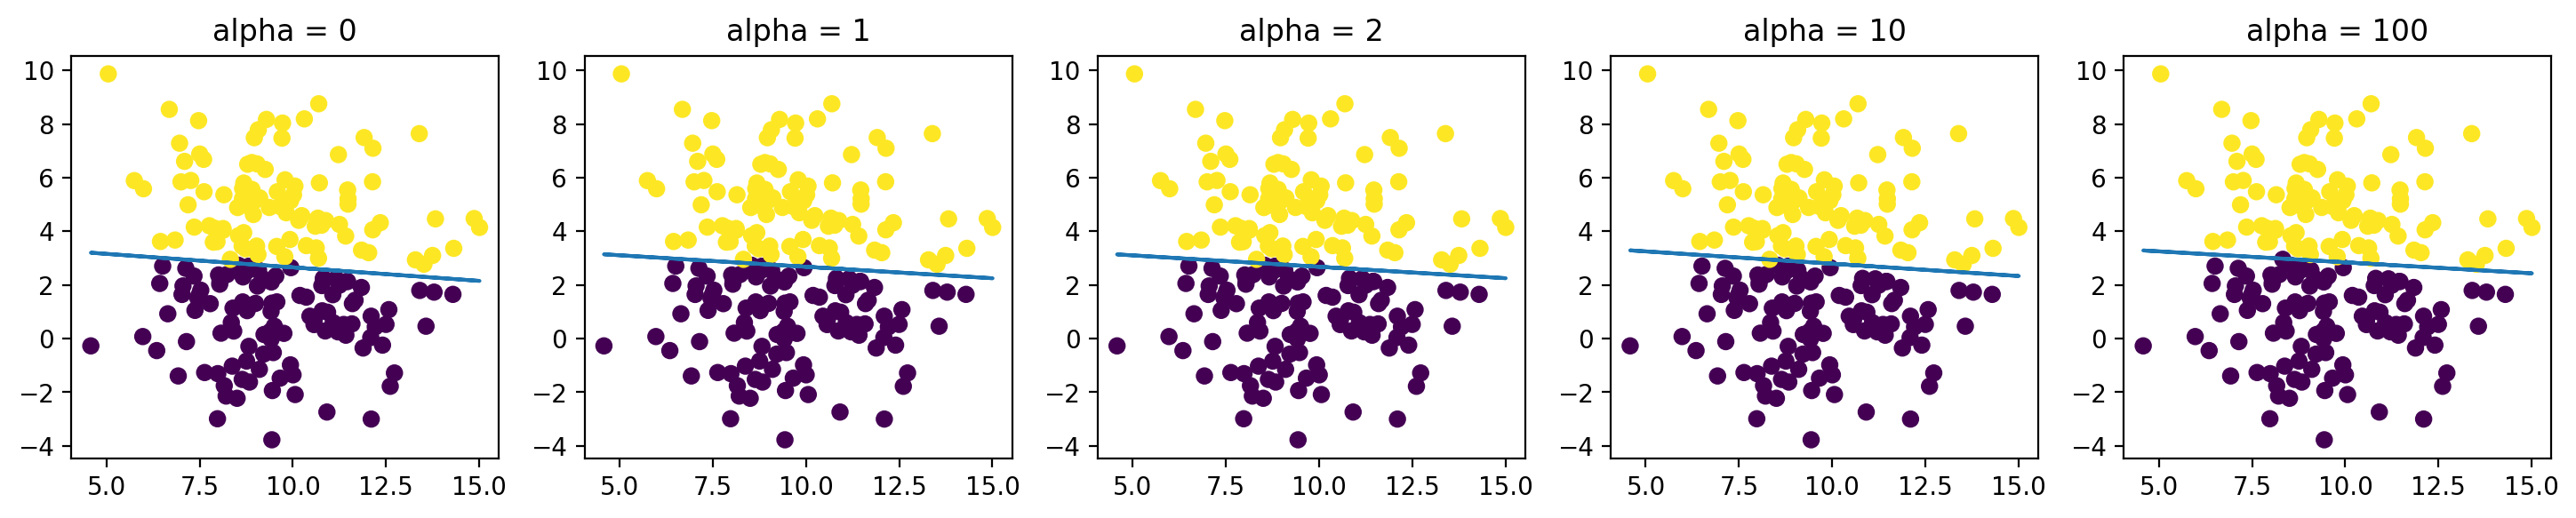

In [12]:
fig, axes = plt.subplots(1, 5, figsize = (18, 3), dpi = 200)

for i, alpha in enumerate(alphas):
    result_svm = minimize(svm, w, args = (X_blob, 2 * y_blob - 1, alpha))
    w_svm = result_svm.x
    
    prediction = linear_classifier(X_blob, w_svm)
    
    m = -w_svm[1] / w_svm[2]
    b = -w_svm[0] / w_svm[2]
    
    axes[i].scatter(X_blob[:, 0], X_blob[:, 1], c = prediction)
    axes[i].plot(X_blob[:, 0], m * X_blob[:, 0] + b, '-')
    
    axes[i].set_title('alpha = {}'.format(alpha))

**Find the optimal set of hyperparameters for an SVM model with Dataset 1.**

Use `GridSearchCV` and find the optimal value of $\alpha$ and $\gamma$.

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel = 'rbf')

# Note that candidates of gamma are not provided so please be aware of this when you do your peer review
# Focus on the process how your classmates approached this problem, not on the final result

# I will set a simple list of sigmas and transform it to a list of gammas
sigmas = np.linspace(5, 50, 10)
gammas = 1. / sigmas

Cs = 1. / np.array(alphas[1:])

param_grid = {'gamma': gammas, 'C': Cs}

# You can do train/test split before GridSearchCV
# In this solution, I won't
# Make sure that you have to shuffle the data before GridSearchCV unless you do train/test split

from sklearn.utils import shuffle

X_shuffle, y_shuffle = shuffle(X_blob, y_blob)

svm_search = GridSearchCV(svc, param_grid, cv = 3)
svm_search.fit(X_shuffle, y_shuffle)

opt_C = svm_search.best_estimator_.C
opt_gamma = svm_search.best_estimator_.gamma

print('Optimal C: {}'.format(opt_C))
print('Optimal gamma: {}'.format(opt_gamma))

Optimal C: 1.0
Optimal gamma: 0.2


**Calculate the accruacy, precision, and recall for the best model.**

You can write your own function that calculates the metrics or you may use built-in functions.

In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

print('Accuracy: {}'.format(accuracy_score(y_blob, svm_search.best_estimator_.predict(X_blob))))
print('Precision: {}'.format(precision_score(y_blob, svm_search.best_estimator_.predict(X_blob))))
print('Recall: {}'.format(recall_score(y_blob, svm_search.best_estimator_.predict(X_blob))))

Accuracy: 0.87
Precision: 0.9021739130434783
Recall: 0.83


**Plot the confusion matrix.**

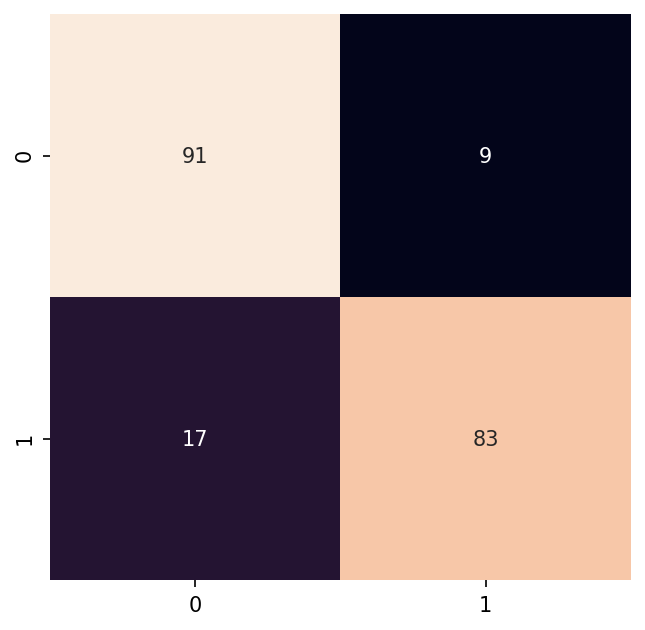

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_blob, svm_search.best_estimator_.predict(X_blob))

fig, ax = plt.subplots(figsize = (5, 5), dpi = 150)
sns.heatmap(cm, annot = True, ax = ax, cbar = False);

**What happens to the decision boundary as $\alpha$ goes to $\infty$?**

> The weights will be over-regularized such that the boundary will be a straight line.

**What happens to the decision boundary as $\gamma$ goes to 0?**

> If $\gamma$ goes to 0, each element in RBF kernel will be just 1. This means that data points become indistinguishable even though they are far from each other. As a result, the boundary will enclose all the data points.

## 4. 6745 Only: Analytical Derivation

**Derive an analytical expression for the gradient of the softmax function with respect to $\vec{w}$.**

The **softmax** loss function is defined as:

$g(\vec{w}) = \sum_i log(1 + \exp{(-y_i \vec{x}_i^T \vec{w}}))$

where $\vec{x}_i$ is the $i$-th row of the input matrix $\bar{\bar{X}}$.

*Hint 1: The function $g(\vec{w})$ can be expressed as $f(r(s(\vec{w})))$ where $r$ and $s$ are arbitrary functions and the chain rule can be applied.*

*Hint 2: You may want to review Ch. 4 of "Machine Learning Refined, 1st Ed."*

> $log\left\{1 + exp(-y_i\vec{x_i}^T\vec{w})\right\} = f(r(s(\vec{w})))$ where $f(r) = log\left\{r\right\}$, $r(s) = 1 + e^{-s}$, $s(\vec{w})=y_i\vec{x_i}^T\vec{w}$  
</br>  
Using the chain rule,  
</br>  
> $\frac{\partial}{\partial\vec{w}}f(r(s(\vec{w})))=\frac{df}{dr}\cdot\frac{dr}{ds}\cdot\frac{\partial}{\partial\vec{w}}s(\vec{w})=\frac{1}{r}\cdot(-e^{-s})\cdot y_i\vec{x_i}=\frac{1}{1+e^{-y_i\vec{x_i}^T\vec{w}}}\cdot(-e^{-y_i\vec{x_i}^T\vec{w}})\cdot y_i\vec{x_i}$  
</br>  
$\therefore \frac{\partial g(\vec{w})}{\partial \vec{w}}=\sum_i \frac{1}{1+e^{-y_i\vec{x_i}^T\vec{w}}}\cdot(-e^{-y_i\vec{x_i}^T\vec{w}})\cdot y_i\vec{x_i}$

**Optional: Logistic regression from the regression perspective**

An alternate interpretation of classification is that we are performing non-linear regression to fit a **step function** to our data (because the output is whether 0 or 1). Since step functions are not differentiable at the step, a smooth approximation with non-zero derivatives must be used. One such approximation is the *tanh* function:

$\tanh{(x)} = \frac{2}{1 + \exp{(-x)}} - 1$

This leads to a reformulation of the classification problem as:

$\vec{y} = \tanh{(\bar{\bar{X}}\vec{w})}$

Show that this is mathematically equivalent to **logistic regression**, or minimization of the **softmax** cost function.

> $y_i \approx 1$ if $\bar{\bar{X}}\vec{w} > 0$  
</br>  
$y_i \approx -1$ if $\bar{\bar{X}}\vec{w} < 0$

> $y_i\bar{\bar{X}}\vec{w}$ will always be positive.  
</br>  
$y_i\bar{\bar{X}}\vec{w} > 0 \rightarrow tanh(y_i\bar{\bar{X}}\vec{w})\approx1$  
</br>  
$tanh(y_i\bar{\bar{X}}\vec{w}) = \frac{2}{1 + \exp{(y_i\bar{\bar{X}}\vec{w}})} - 1 \approx 1$  
</br>  
$1 + \exp{(y_i\bar{\bar{X}}\vec{w}}) \approx 1$  

> Therefore,  
</br>  
$log\left\{1 + exp(-y_i\bar{\bar{X}}\vec{w})\right\}\approx0$  
</br>  
$\therefore g_{softmax}(\vec{w}) = \sum_i log\left\{1 + exp(-y_i \bar{\bar{X}}\vec{w})\right\}\approx0$

# Classification - Assignment 7

## Data and Package Import

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt

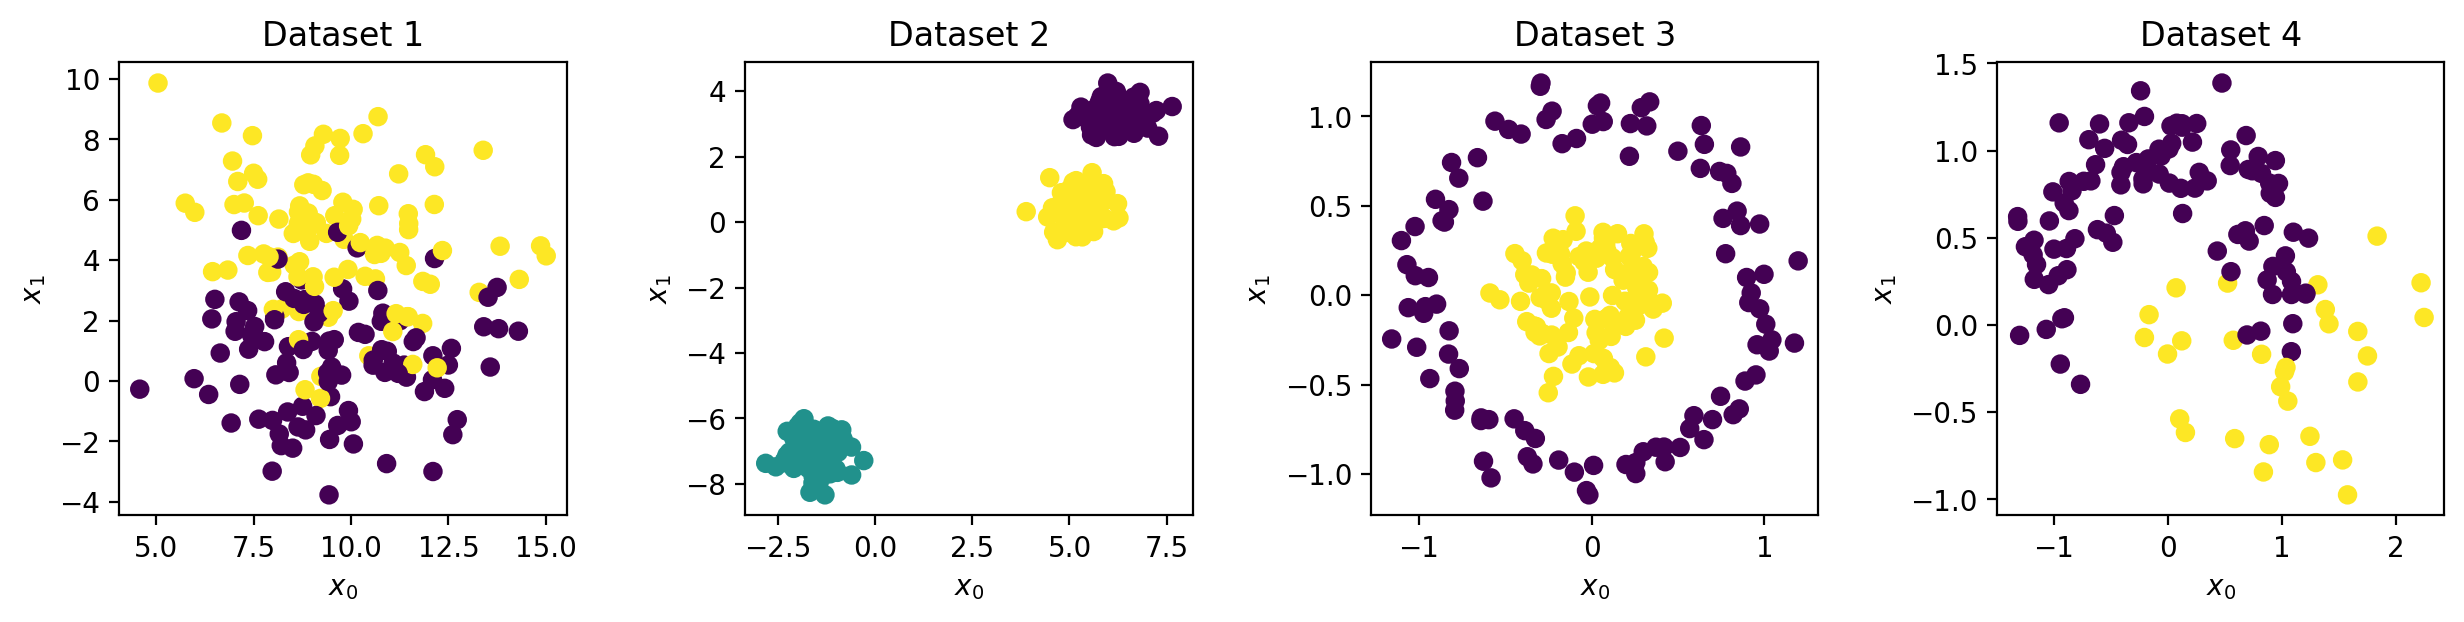

In [2]:
from sklearn.datasets import make_blobs, make_moons, make_circles
np.random.seed(4)

noisiness = 1

X_blob, y_blob = make_blobs(n_samples = 200, centers = 2, cluster_std = 2 * noisiness, n_features = 2)

X_mc, y_mc = make_blobs(n_samples = 200, centers = 3, cluster_std = 0.5 * noisiness, n_features = 2)

X_circles, y_circles = make_circles(n_samples = 200, factor = 0.3, noise = 0.1 * noisiness)

X_moons, y_moons = make_moons(n_samples = 200, noise = 0.25 * noisiness)

N_include = 30
idxs = []
Ni = 0
for i, yi in enumerate(y_moons):
    if yi == 1 and Ni < N_include:
        idxs.append(i)
        Ni += 1
    elif yi == 0:
        idxs.append(i)

y_moons = y_moons[idxs]
X_moons = X_moons[idxs]

fig, axes = plt.subplots(1, 4, figsize = (15, 3), dpi = 200)

all_datasets = [[X_blob, y_blob], [X_mc, y_mc], [X_circles, y_circles], [X_moons, y_moons]]

labels = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']
for i, Xy_i in enumerate(all_datasets):
    Xi, yi = Xy_i
    axes[i].scatter(Xi[:, 0], Xi[:, 1], c = yi)
    axes[i].set_title(labels[i])
    axes[i].set_xlabel('$x_0$')
    axes[i].set_ylabel('$x_1$')

fig.subplots_adjust(wspace = 0.4);

In [3]:
df = pd.read_csv('data/perovskite_data.csv')
X_perov = df[['nA', 'nB', 'nX', 'rA (Ang)', 'rB (Ang)', 'rX (Ang)', 't', 'tau']].values
y_perov = df['exp_label'].values

## 1. k-nearest Neighbors Model

### 1-NN
**Calculate the accuracy of a 1-nearest Neighbors model for the training data.**

A 1-nearest Neighbors model considers a point as its own nearest neighbors.

*Hint: the block below is not a code block.*

> Accuracy will be just 1. 1-NN simple memorizes the label of each data point.

**Will this be a reliable indicator of its accuracy for testing data?**

Briefly explain your answer.

> No. Even though the accuracy is 1, this cannot be a reliable indicator, since we know that this score is due to a simple memorization.

### Weighted Neighbors Classification

Instead of selecting the k-nearest neighbors to vote, we could design an algorithm where all neighbors get to vote, but their vote is weighted inversely to their distance from the point of interest:

$y_i = \sum_j y_j/(||x_i - x_j||)$

where $j$ is an index over all training points.

The class will be assigned as follows:

- class 1 if $y_i \geq 0$

- class -1 if $y_i < 0$

In [4]:
def distance(x1, x2):
    return np.linalg.norm(x1 - x2, 2)

In [5]:
def get_neighbor(x, x_list):
    dist_pairs = []
    for i, xi in enumerate(x_list):
        dist = distance(x, xi)
        dist_pairs.append([dist, i])
    return dist_pairs

**Write a function that assigns a class to a point.**

The function should take the followings as arguments:
- a single point `x`
- a list of training points `x_list`
- a list of training labels `y_list`

You may want to use functions above. You will also need to add a statement to avoid dividing by zero if the point is in the training set. If the distance between 2 points is zero, then the label from the same point in the training set should be used (e.g. if $x_i = x_j$ then $y_i = y_j$).

In [6]:
def assign_class(x, x_list, y_list):
    neighbors = get_neighbor(x, x_list)
    vote = 0
    
    for i, xi in enumerate(neighbors):
        vote += y_list[i] / neighbors[i][0]
        if neighbors[i][0] == 0:
            vote = y_list[i]
            break
    
    if vote >= 0:
        assignment = 1
    else:
        assignment = -1

    return assignment

**Write a function that returns the prediction for a given list of testing points.**

The function should take the followings as arguments:
- a list of testing points `X`
- a list of training points `X_train`
- a list of training labels `y_train`

In [7]:
def weighted_neighbors(X, X_train, y_train):
    y_hat = []
    for x in X:
        assign = assign_class(x, X_train, y_train)
        y_hat.append(assign)
    return y_hat

**Train the model for the perovskite dataset using a random selection of 75% of the data as training data.**

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_perov, y_perov, test_size = 0.25)
y_predict = weighted_neighbors(X_perov, X_train, y_train)

/Users/SihoonChoi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


**Compute the accuracy and precision of the prediction.**

In [9]:
from sklearn.metrics import accuracy_score, precision_score

acc = accuracy_score(y_perov, y_predict)
prec = precision_score(y_perov, y_predict)

print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(prec))

Accuracy: 0.9635416666666666
Precision: 0.9506172839506173


**Train a 5-NN model using the same training data.**

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)
y_predict = knn.predict(X_perov)

**Compute the accuracy and precision.**

In [11]:
acc = accuracy_score(y_perov, y_predict)
prec = precision_score(y_perov, y_predict)

print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(prec))

Accuracy: 0.9322916666666666
Precision: 0.9391025641025641


## 2. Multi-dimensional Classification

### Simple logistic regression
**Train a logistic regression model using all columns except the `tau` column of the perovskite dataset.**

You may use some functions that have been already built in the previous assignments.

In [12]:
from sklearn.linear_model import LogisticRegression

X = X_perov[:, :-1]

logreg = LogisticRegression(penalty = 'none') # no regularization
logreg.fit(X, y_perov);

**Plot the confusion matrix.**

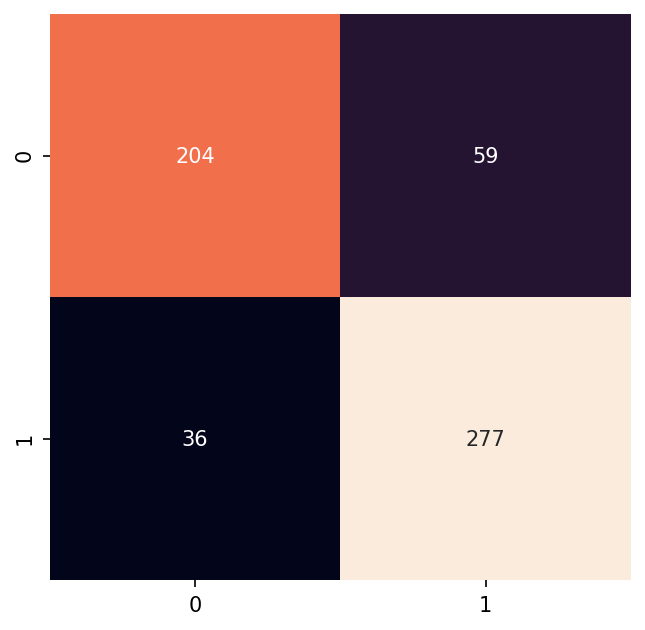

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_predict = logreg.predict(X)
cm = confusion_matrix(y_perov, y_predict)

fig, ax = plt.subplots(figsize = (5, 5), dpi = 150)
sns.heatmap(cm, annot = True, ax = ax, cbar = False, fmt = 'd');

**Compute the accuracy, precision and recall.**

In [14]:
from sklearn.metrics import recall_score

acc = accuracy_score(y_perov, y_predict)
prec = precision_score(y_perov, y_predict)
rec = recall_score(y_perov, y_predict)

print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(prec))
print('Recall: {}'.format(rec))

Accuracy: 0.8350694444444444
Precision: 0.8244047619047619
Recall: 0.8849840255591054


### 6745 Only: Customizing non-linear boundaries

In this problem, you will create a single custom feature that improves the separation performance as much as possible.

**Plot the `y_perov` as a function of `rA (Ang)` and `rB (Ang)`.**

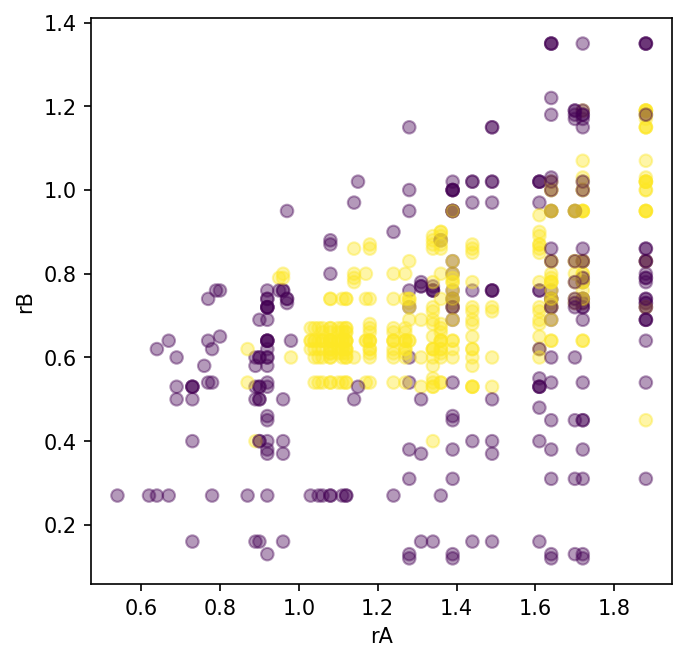

In [15]:
rA = X_perov[:, 3]
rB = X_perov[:, 4]

fig, ax = plt.subplots(figsize = (5, 5), dpi = 150)
ax.scatter(rA, rB, c = y_perov, alpha = .4)
ax.set_xlabel('rA')
ax.set_ylabel('rB');

**Build a baseline model based on logistic regression.**

Report the accuracy and precision of the baseline model.

In [16]:
logreg = LogisticRegression(penalty = 'none')

logreg.fit(X_perov[:, [3, 4]], y_perov)
y_predict = logreg.predict(X_perov[:, [3, 4]])

acc = accuracy_score(y_perov, y_predict)
prec = precision_score(y_perov, y_predict)

print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(prec))

Accuracy: 0.6631944444444444
Precision: 0.6263269639065817


**Plot the prediction of the baseline model.**

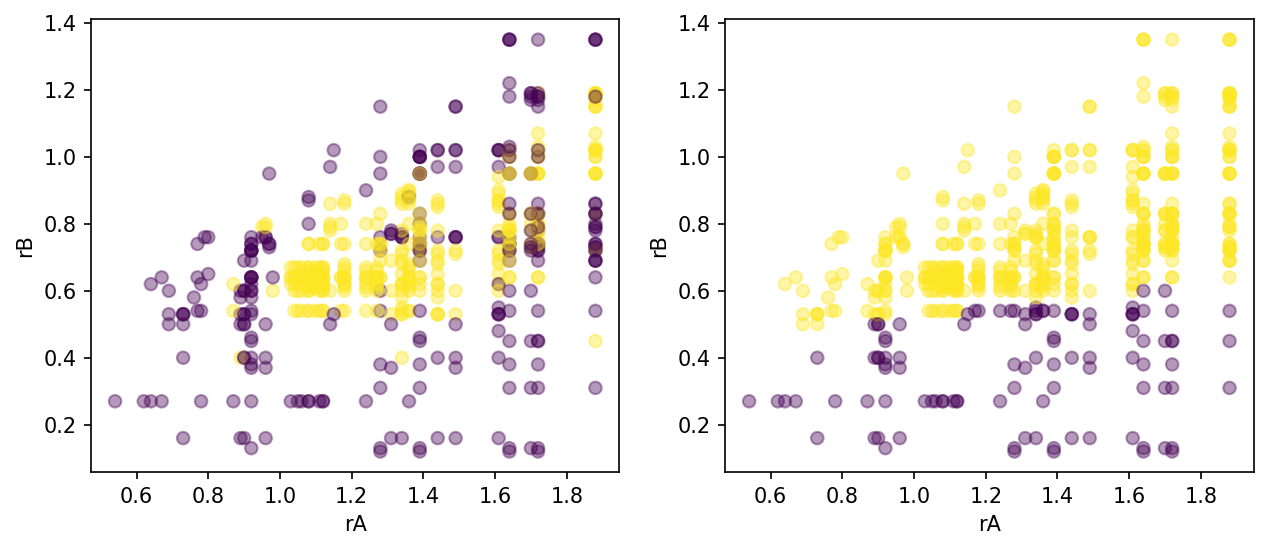

In [17]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4), dpi = 150)

axes[0].scatter(rA, rB, c = y_perov, alpha = .4)
axes[0].set_xlabel('rA')
axes[0].set_ylabel('rB')

axes[1].scatter(rA, rB, c = y_predict, alpha = .4)
axes[1].set_xlabel('rA')
axes[1].set_ylabel('rB');

**Create a new feature based on a non-linear combination of `rA (Ang)` and `rB (Ang)`.**

Plot the new feature as a function of `rA (Ang)`.

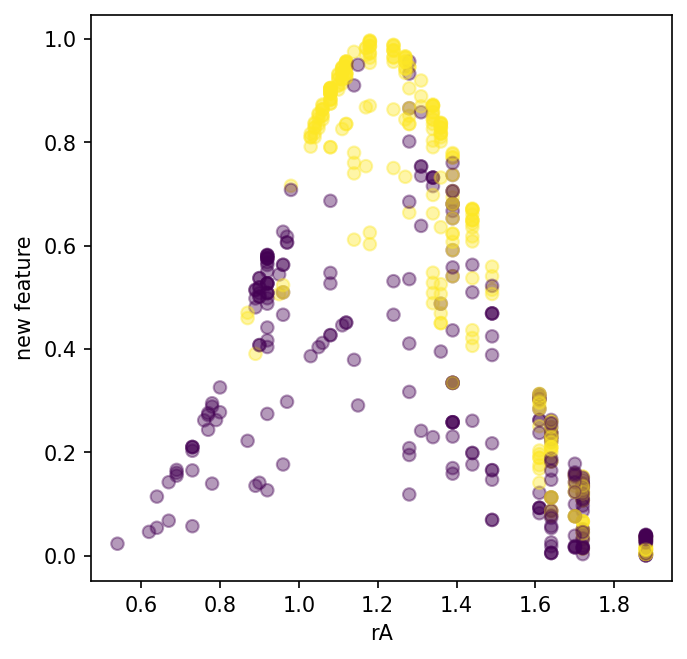

In [18]:
X_new = np.exp((rA - 1.2)**2 + (rB - 0.6)**2)**(-6.9)
X_new = X_new.reshape(-1, 1)

fig, ax = plt.subplots(figsize = (5, 5), dpi = 150)
ax.scatter(rA, X_new, alpha = .4, c = y_perov)
ax.set_xlabel('rA')
ax.set_ylabel('new feature');

**Build a new model that includes `rA (Ang)`, `rB (Ang)` and your new feature.**

Report the accuracy and precision.

In [19]:
X_new_matrix = np.append(X_perov[:, [3, 4]], X_new, 1)

logreg.fit(X_new_matrix, y_perov)
y_predict = logreg.predict(X_new_matrix)

acc = accuracy_score(y_perov, y_predict)
prec = precision_score(y_perov, y_predict)

print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(prec))

Accuracy: 0.8038194444444444
Precision: 0.8597122302158273


**Plot the result of your new model.**

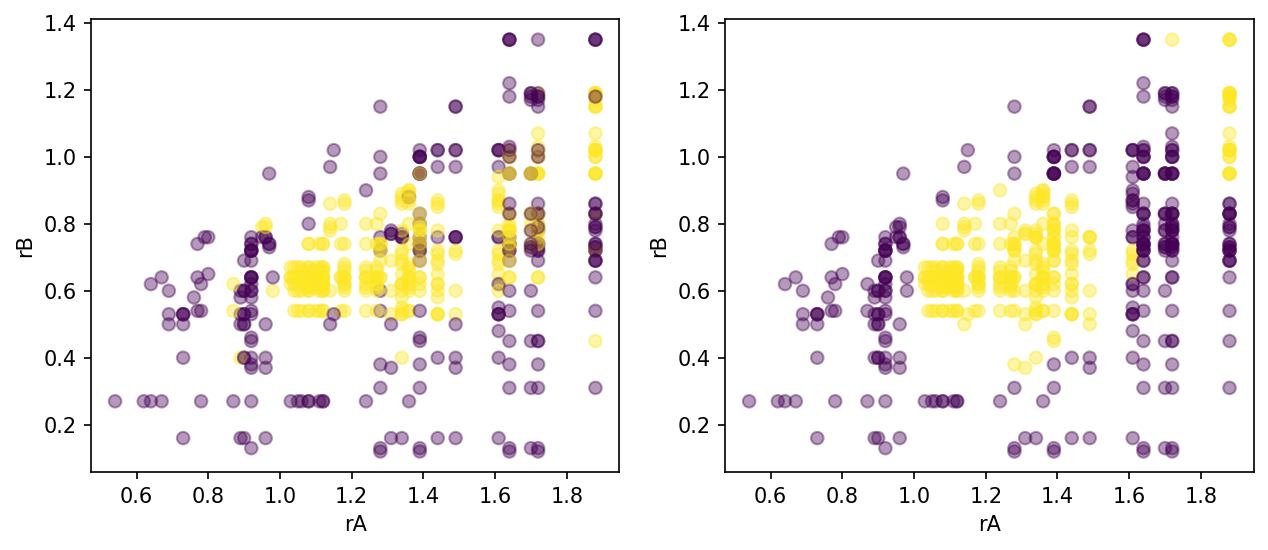

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4), dpi = 150)

axes[0].scatter(rA, rB, c = y_perov, alpha = .4)
axes[0].set_xlabel('rA')
axes[0].set_ylabel('rB')

axes[1].scatter(rA, rB, c = y_predict, alpha = .4)
axes[1].set_xlabel('rA')
axes[1].set_ylabel('rB');

**Briefly explain how you decided on the feature.**

## 3. Comparison of Classification Model

In this problem, you will compare the classification performance of three different models using the perovskite dataset.

**Choose three different classification models and import them.**

These could be models discussed in the lectures, or others that you have learned about elsewhere.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

rf = RandomForestClassifier()
logreg = LogisticRegression(solver = 'saga')
knn = KNeighborsClassifier()

**Make a hyperparameter grid for each model.**

You should optimize at least one hyperparameter for each model.

In [22]:
param_rf = {'n_estimators': [50, 100, 150], 'max_depth': [2, 3, 4]}
param_logreg = {'penalty': ['l1', 'l2', 'none']}
param_knn = {'n_neighbors': [2, 3, 4, 5]}

**Optimize hyperparameters.**

First, you select a validation set using hold-out (`train_test_split`). Optimize hyperparameters using `GridSearchCV` on the training set.

In [23]:
from sklearn.model_selection import GridSearchCV
import warnings

warnings.simplefilter('ignore')

X_train, X_test, y_train, y_test = train_test_split(X_perov, y_perov, test_size = .25)

rf_search = GridSearchCV(rf, param_rf, cv = 3)
logreg_search = GridSearchCV(logreg, param_logreg, cv = 3)
knn_search = GridSearchCV(knn, param_knn, cv = 3)

rf_search.fit(X_train, y_train)
logreg_search.fit(X_train, y_train)
knn_search.fit(X_train, y_train)

rf_best = rf_search.best_estimator_
logreg_best = logreg_search.best_estimator_
knn_best = knn_search.best_estimator_

**Compare the accuracy by predicting the results of the validation set.**

In [24]:
print('Accuracy of Random Forest: {}'.format(accuracy_score(y_test, rf_best.predict(X_test))))
print('Accuracy of Logistic Regression: {}'.format(accuracy_score(y_test, logreg_best.predict(X_test))))
print('Accuracy of k-Nearest Neighbors: {}'.format(accuracy_score(y_test, knn_best.predict(X_test))))

Accuracy of Random Forest: 0.9166666666666666
Accuracy of Logistic Regression: 0.6597222222222222
Accuracy of k-Nearest Neighbors: 0.9444444444444444


**Briefly describe your conclusions based on the results.**